## Exploratory Data Analysis

In [1]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('/Users/gurjitsingh/Desktop/MS Data Science/MS_Project_Python/fully_imputed.csv')
df.head()

,area,year,item,export_quantity,export_value,import_quantity,import_value,area_harvested,production,yield,...,least_developed_country,land_locked_developing_country,small_island_developing_state,low_income_food_deficit_country,net_food_importing_developing_country,temp_change_meteorological_year,temp_change_dec_jan_feb,temp_change_jun_jul_aug,temp_change_sep_oct_nov,temp_change_mar_apr_may
0,Afghanistan,2001,"Almonds, in shell",10900.0,3000.0,10.877912,10.261501,9000.0,15000.00,1666.7,...,1.0,1.0,0.0,1.0,1.0,1.377,0.433,1.090,1.209,2.778
1,Afghanistan,2002,"Almonds, in shell",7355.0,2041.0,12.133391,13.651945,5500.0,11773.99,2140.7,...,1.0,1.0,0.0,1.0,1.0,1.457,1.722,0.991,1.589,1.524
2,Afghanistan,2003,"Almonds, in shell",7395.0,3219.0,9.425356,12.950618,5700.0,14000.00,2456.1,...,1.0,1.0,0.0,1.0,1.0,0.710,1.105,0.947,0.787,0.002
3,Afghanistan,2004,"Almonds, in shell",6163.0,3342.0,10.303944,14.898475,12000.0,14700.00,1225.0,...,1.0,1.0,0.0,1.0,1.0,1.482,1.959,0.789,1.182,1.999
4,Afghanistan,2005,"Almonds, in shell",4719.0,5888.0,11.206330,18.171417,11768.0,15630.00,1328.1,...,1.0,1.0,0.0,1.0,1.0,0.513,-0.305,0.702,1.306,0.348


In [3]:
# Check the shape (rows, columns)
df.shape

(117207, 103)

In [4]:
# Check number of columns having at least one missing value
df.isna().any().sum()

np.int64(0)

In [5]:
# list of unwanted columns
unwanted_cols = ['area_code_m49', 'area_code', 'year_code']

# drop the unwanted columns from the dataset
df_1 = df.drop(unwanted_cols, axis=1).copy()
df_1.shape

(117207, 100)

### Checking distribution of variables

In [7]:
# Creating groups of variables for easier visualization
agronomic_vars = [
    'area_agri_land', 'area_arable_land', 'area_cropland', 'area_with_irrigation', 
    'area_permanent_crops', 'area_temporary_crops', 'cropland_area_per_capita', 
    'area_harvested', 'production', 'yield', 'gross_production_index', 
    'producer_price_index', 'value_per_unit_agri_land'
]

agri_trade_vars = [
    'export_quantity', 'export_value', 'import_quantity', 'import_value', 
    'phosphorus_export_quantity', 'phosphorus_import_quantity', 
    'potassium_export_quantity', 'potassium_import_quantity', 
    'nitrogen_export_quantity', 'nitrogen_import_quantity', 
    'total_pesticide_export_quantity', 'total_pesticide_export_value',
    'total_pesticide_import_quantity', 'total_pesticide_import_value'
]

temp_change_vars = [
    'temp_change_meteorological_year', 'temp_change_dec_jan_feb',
    'temp_change_jun_jul_aug', 'temp_change_sep_oct_nov', 'temp_change_mar_apr_may'
]

economic_vars = [
    'gross_domestic_product', 'gross_fixed_capital_formation',
    'value_added_ag_forest_fish', 'gdp_annual_growth', 'gfcf_annual_growth',
    'value_added_ag_forest_fish_annual_growth', 'gfcf_share_in_total_gdp',
    'ag_forest_fish_share_in_total_gdp', 
]

credit_vars = [
    'total_fdi_inflows', 'agri_orientation_index_govt_expenditure',
    'govt_expenditure_on_ag_forest_fish', 'total_govt_expenditure',
    'credit_to_ag_forest_fish', 'credit_to_ag_forest_fish_share_total_credit',
    'aoi_credit_to_ag_forest_fish', 'total_credit'
]

emission_vars = [
    'emission_share_farmgate', 'emission_share_land_use_change',
    'emission_share_pre_and_post_production', 'emission_share_end_to_end_agrifood', 
    'emission_share_crops', 'emission_share_livestock', 
    'emission_share_ipcc_agriculture', 'emission_share_energy_use', 
    'emission_share_agri_waste_mgt'
]

demographic_vars = [
    'value_added_per_worker', 'employment_in_agri',
    'agri_employment_share_in_total_employment', 'total_employment_afs',
    'afs_employment_share_in_total_employment', 'rural_population',
    'urban_population', 'total_population'
]

fertilizer_vars = [
    'nitrogen_agri_use', 'nitrogen_production', 'nitrogen_use_per_area_of_cropland',
    'nitrogen_use_per_capita', 'nitrogen_use_per_value_of_ag_production',
    'phosphorus_agri_use', 'phosphorus_production',
    'phosphorus_use_per_area_of_cropland', 'phosphorus_use_per_capita',
    'phosphorus_use_per_value_of_ag_production', 'potassium_agri_use',
    'potassium_use_per_area_of_cropland', 'potassium_use_per_capita',
    'potassium_use_per_value_of_ag_production',
    'cropland_nitrogen_per_unit_area', 'cropland_nitrogen_use_efficiency',
    'cropland_phosphorus_per_unit_area', 'cropland_phosphorus_use_efficiency',
    'cropland_potassium_per_unit_area', 'cropland_potassium_use_efficiency'
]

pesticide_vars = [
    'total_pesticide_use_for_agriculture',
    'total_pesticide_use_per_area_of_cropland',
    'total_pesticide_use_per_capita',
    'total_pesticide_use_per_value_of_agri_production',
    'total_pesticide_export_quantity', 'total_pesticide_export_value',
    'total_pesticide_import_quantity', 'total_pesticide_import_value'
]

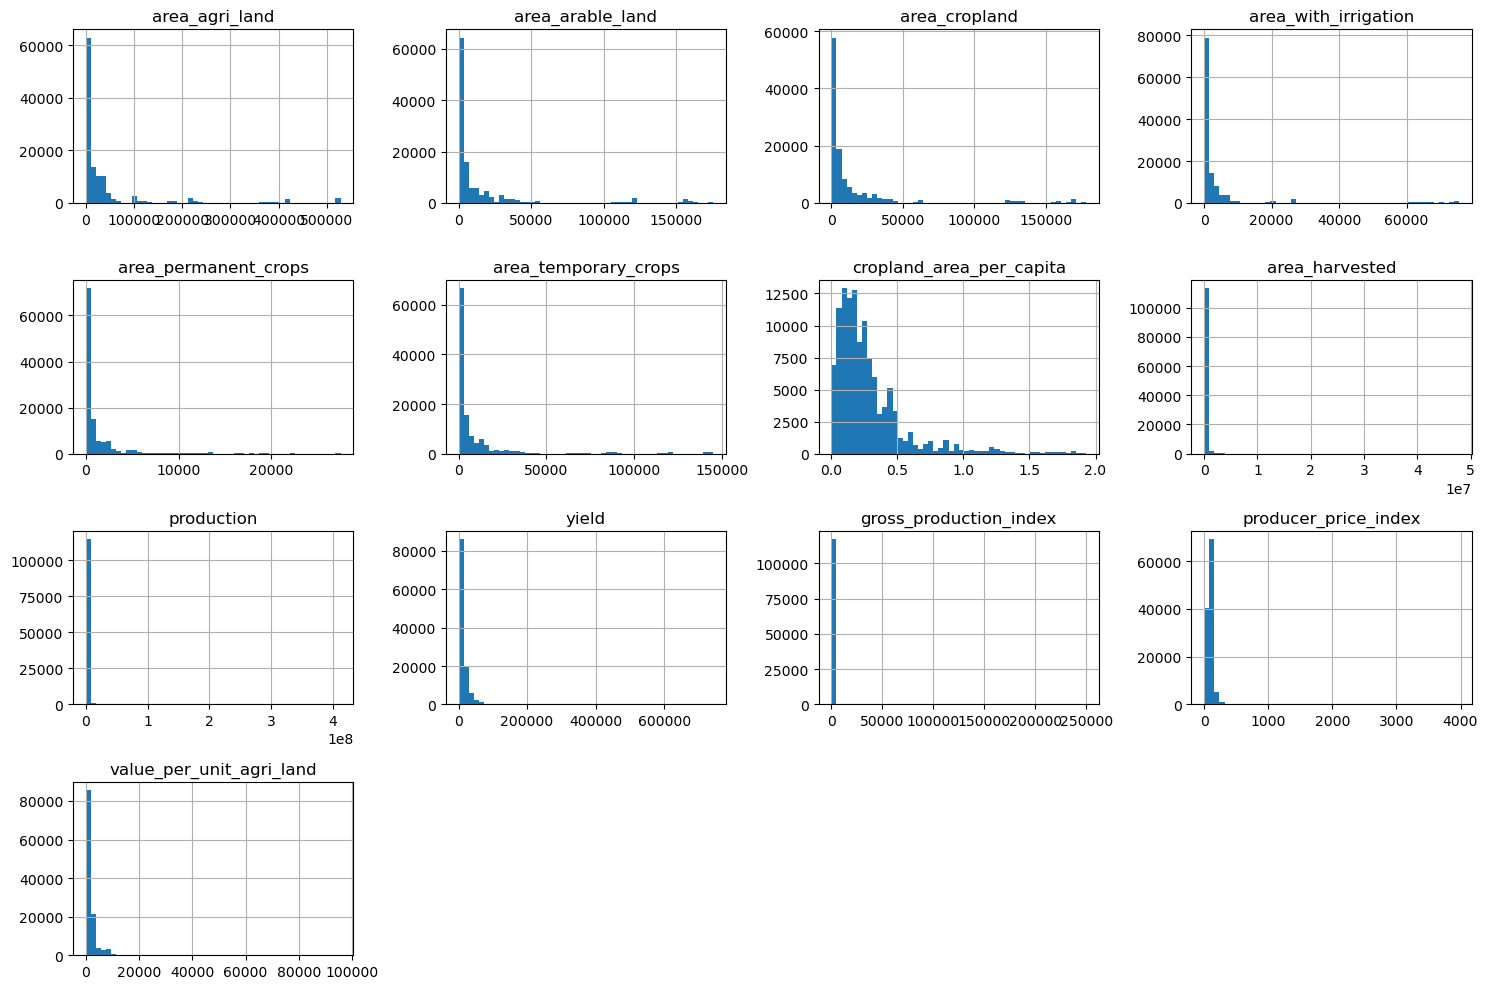

In [8]:
# Distribution of Agronomic variables
df_1[agronomic_vars].hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()

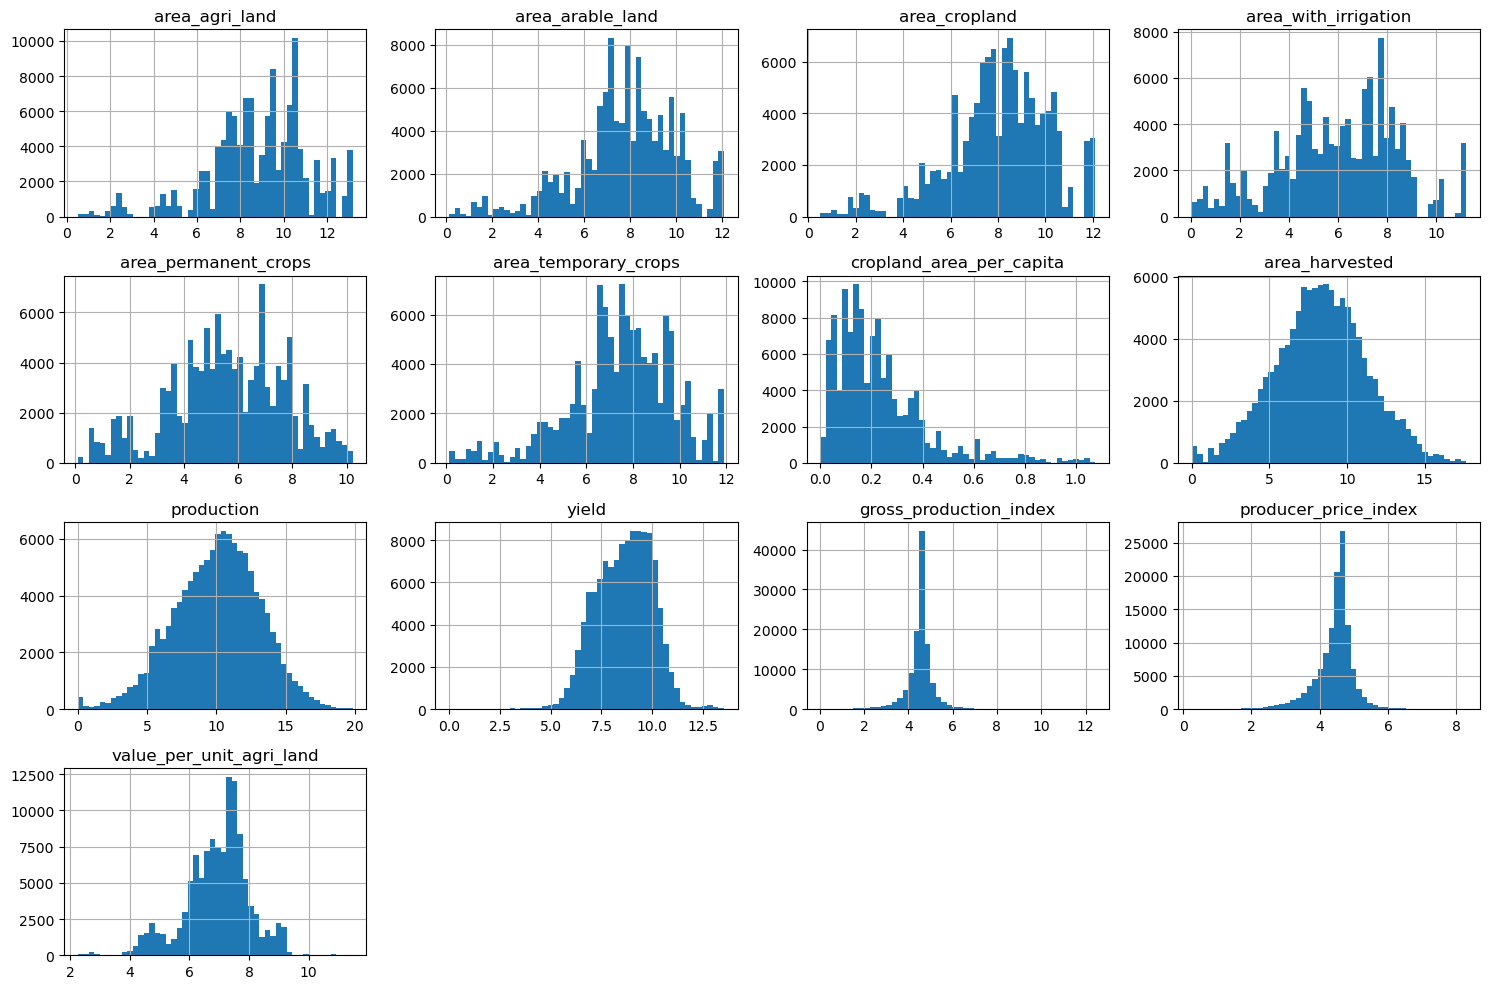

In [ ]:
# Distribution of Agronomic variables (after log(x+1) transformation)
np.log1p(df_1[agronomic_vars]).hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()

**Insights from the distribution plots for Agronomic variables:**

- Most agronomic variables exhibit strong right-skewness, indicating that a 
  log(1+x) transformation would be beneficial before applying distance-based 
  models such as linear regression, k-NN, or neural networks. After transformation, 
  the distributions appear much closer to normal, improving model stability and 
  interpretability.

- Extremely high values are present across several variables, likely corresponding 
  to large agricultural economies. This suggests the presence of grouping effects 
  in the data. To mitigate potential bias from these dominant economies, it may 
  be useful to incorporate regional or sub-regional grouping during model training.

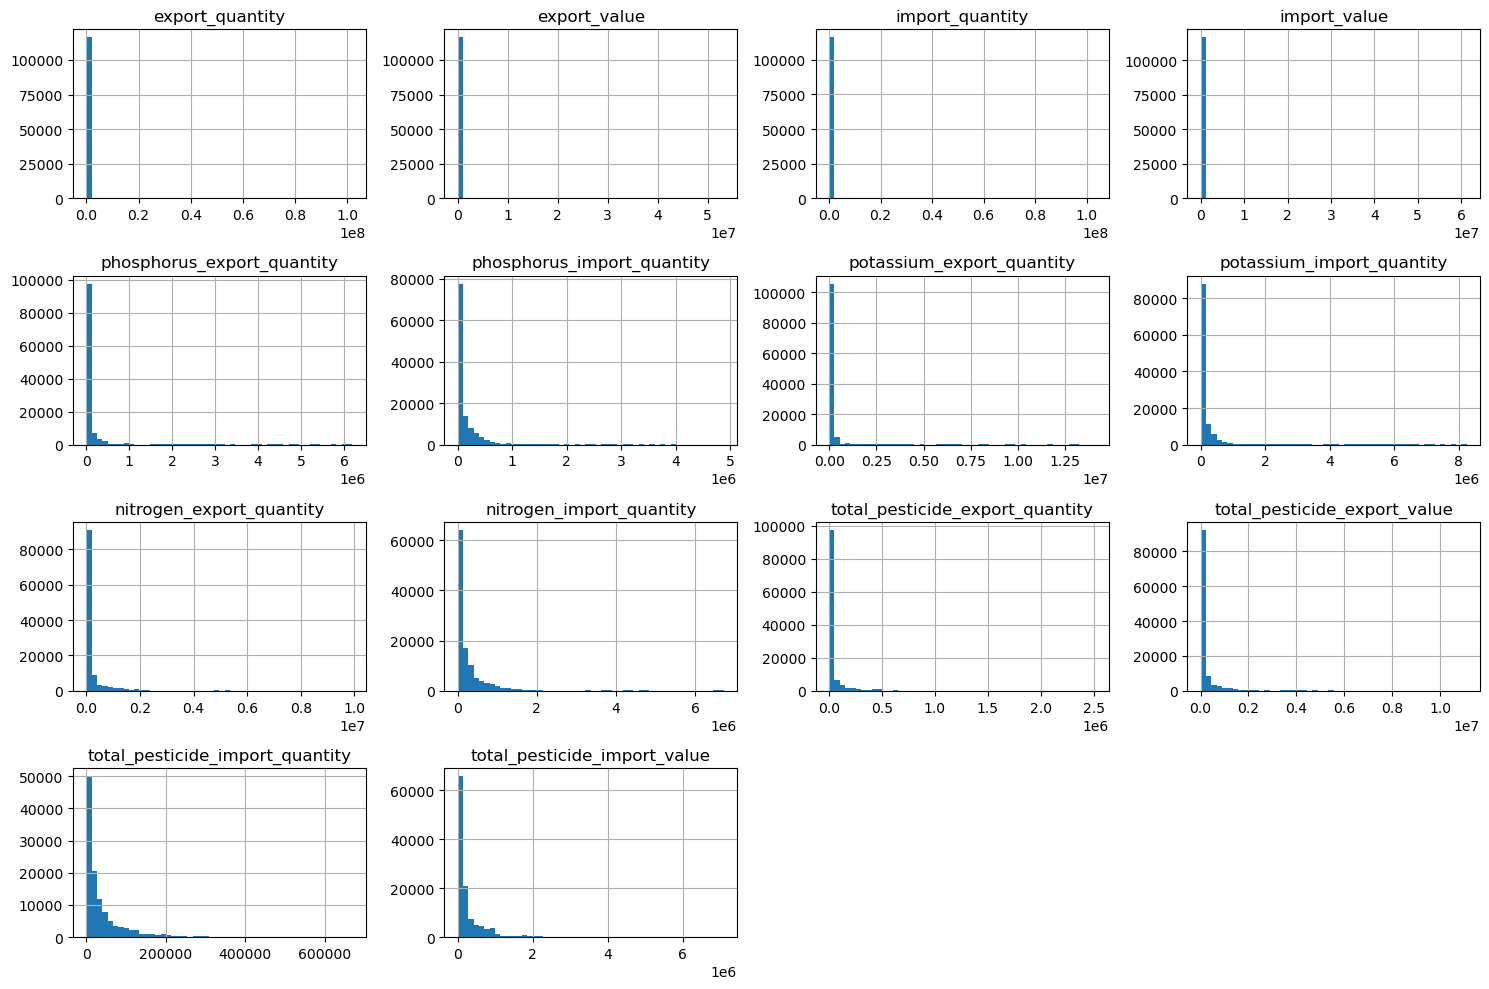

In [9]:
# Distribution of Agricultural-trade variables
df_1[agri_trade_vars].hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()

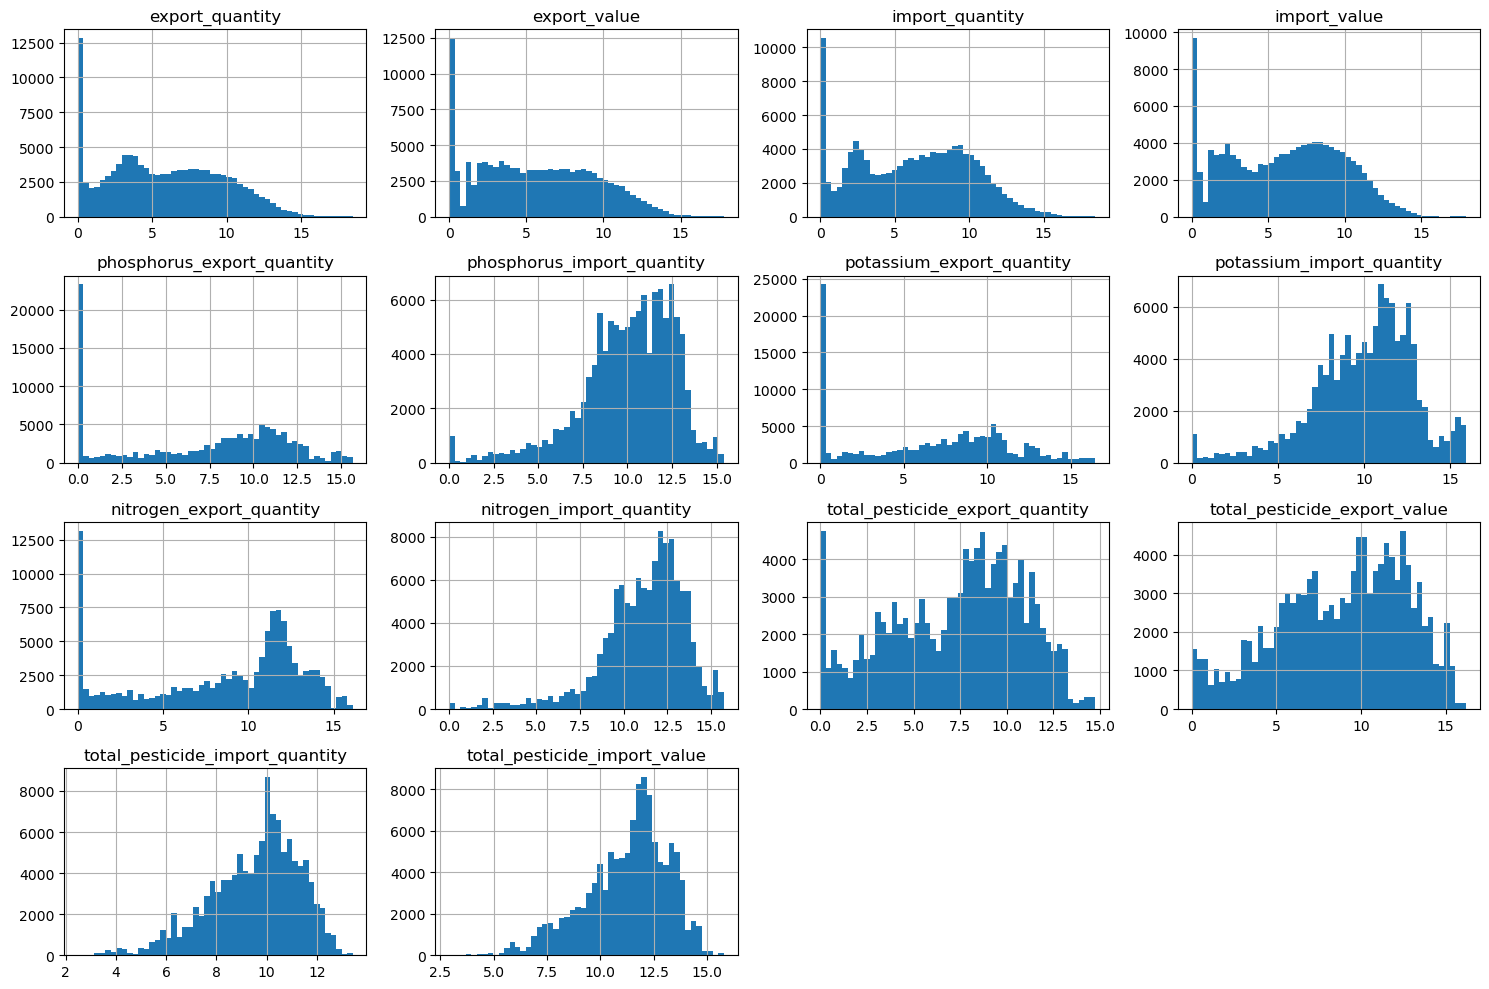

In [10]:
# Distribution of Agricultural-trade variables (after log(1+x) transformation)
np.log1p(df_1[agri_trade_vars]).hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()

**Insights from agri-trade variable distributions:**

- All import and export variables exhibit pronounced right-skewness with a large 
  concentration of zero values, indicating that many countries report no trade 
  activity for certain agricultural products. The log(1+x) transformation reduces 
  skewness for the positive values but cannot eliminate the spike at zero, 
  since log(1+0) remains zero. This pattern reflects a genuine structural 
  characteristic of the data rather than noise.

- After transformation, several variables show multimodal patterns, 
  suggesting the presence of distinct economic tiers- non-trading or low-volume 
  economies, mid-level traders, and large agricultural exporters or importers.


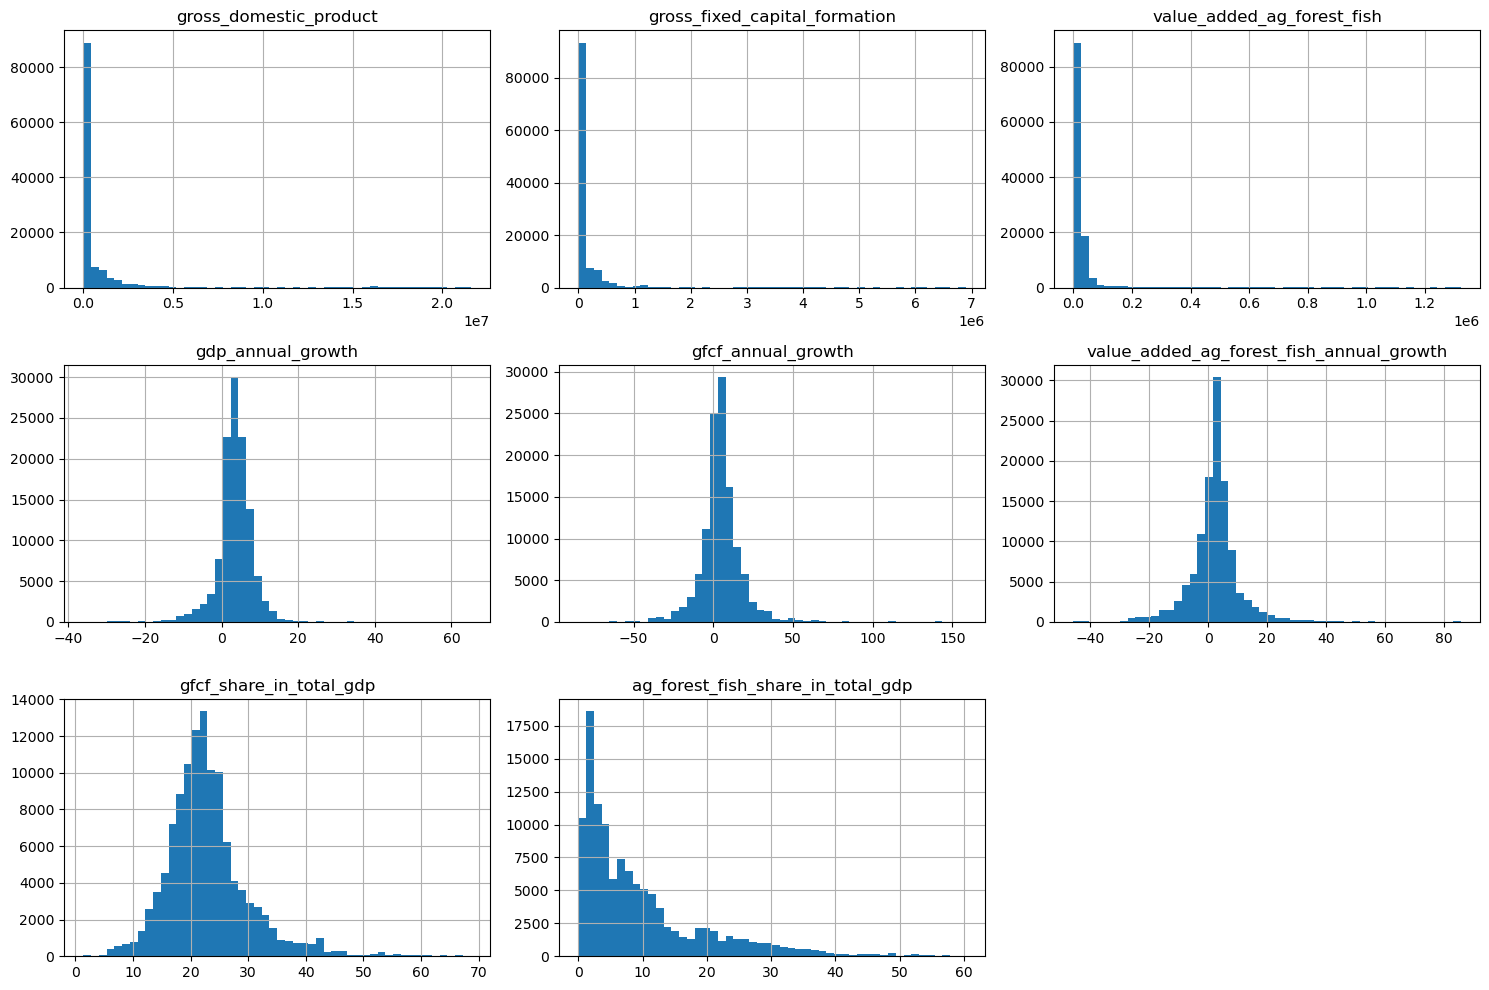

In [11]:
# Distribution of Economic variables
df_1[economic_vars].hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()

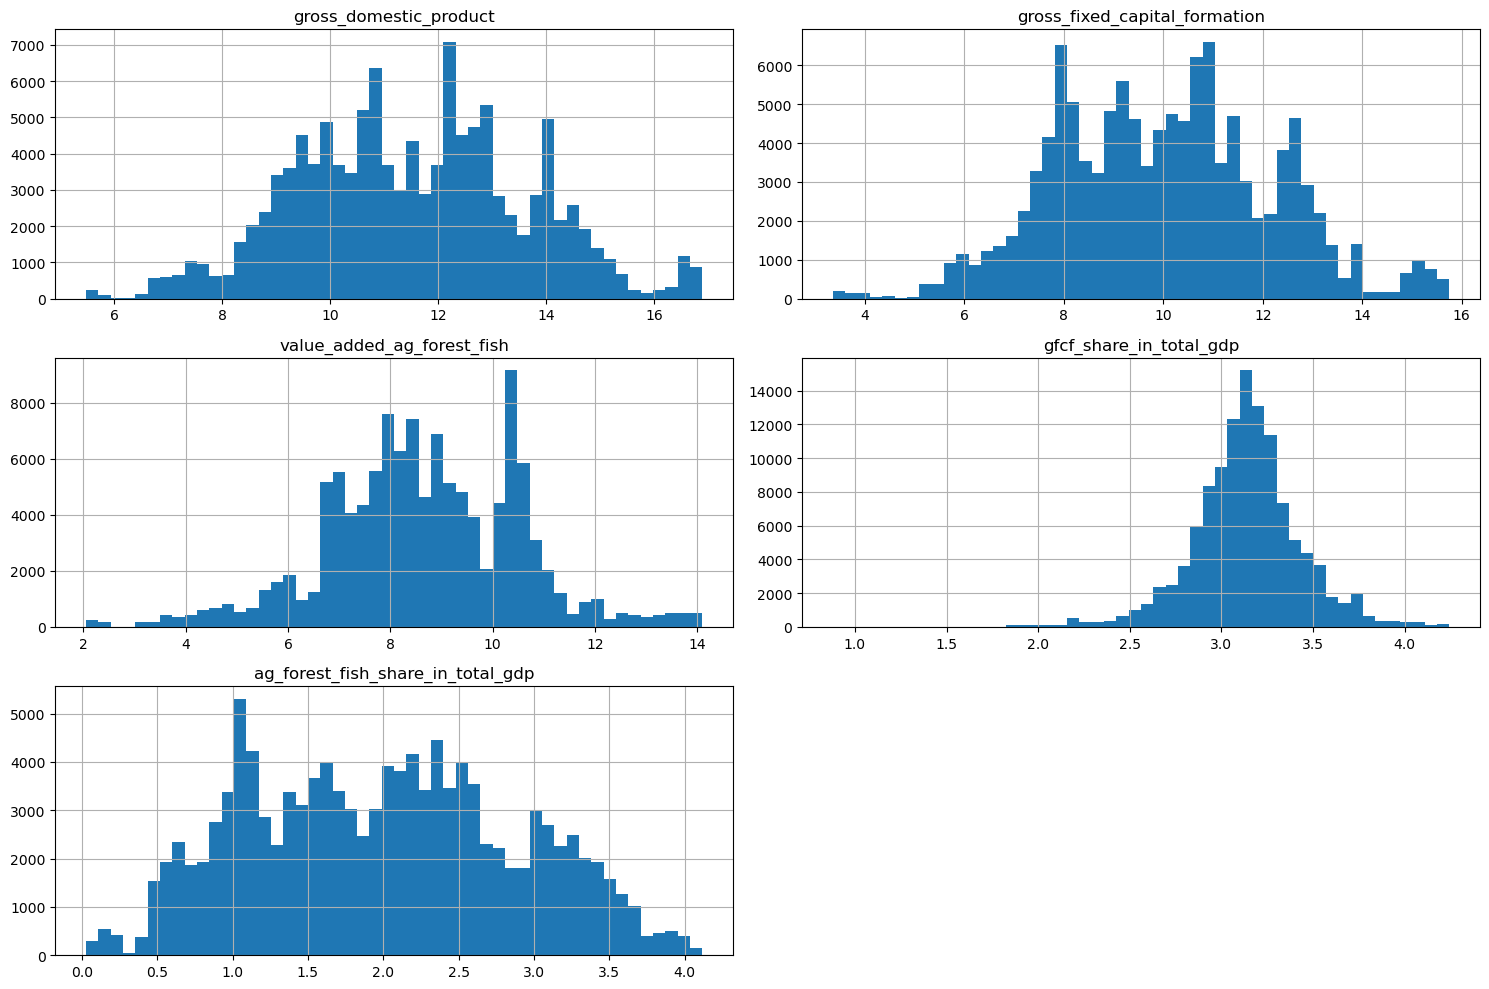

In [12]:
# Distribution of Economic variables (after log(1+x) transformation)
economic_vars_positive = [c for c in economic_vars if min(df_1[c]) >= 0]

np.log1p(df_1[economic_vars_positive]).hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()


**Insights from economic variable distributions:**

- Most macroeconomic indicators (e.g., GDP, gross fixed capital formation, and 
  value added from agriculture, forestry, and fisheries) are heavily right-skewed, 
  reflecting the influence of a few large economies with disproportionately high 
  values. This mirrors global economic inequality and is consistent with patterns 
  seen in the agronomic and trade variables.

- Annual growth variables (GDP, GFCF, and agricultural value-added growth) 
  exhibit approximately normal distributions centered near zero.

- After applying the log(1+x) transformation, the variables become more symmetric 
  but reveal multimodal patterns, suggesting distinct economic clusters-typically 
  large, mid-tier, and smaller economies.

- These observations imply that economic size is a key latent factor influencing 
  variability across features. Accounting for this structure, such as by 
  incorporating region or income group as model features, may help improve model 
  generalization and reduce bias toward dominant economies.

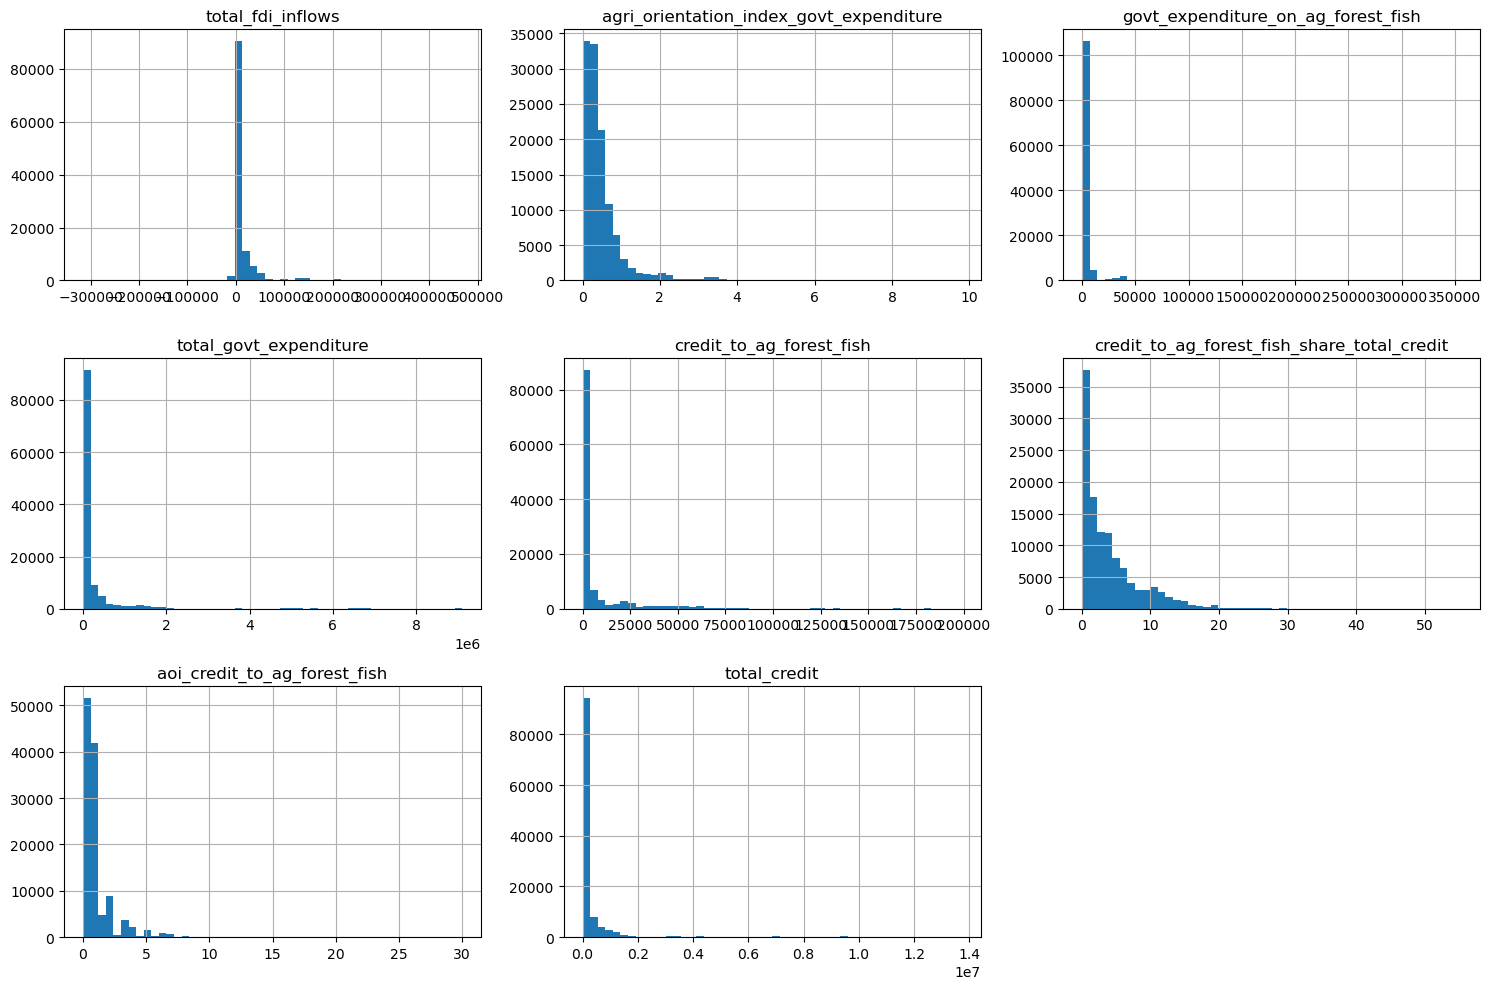

In [21]:
# Distribution of Credit variables
df_1[credit_vars].hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()

In [23]:
df_1['total_fdi_inflows'].describe()

count    117207.000000
mean      13359.897896
std       38919.281149
min     -315678.309095
25%         471.346660
50%        2205.204431
75%       10049.816613
max      467625.000000
Name: total_fdi_inflows, dtype: float64

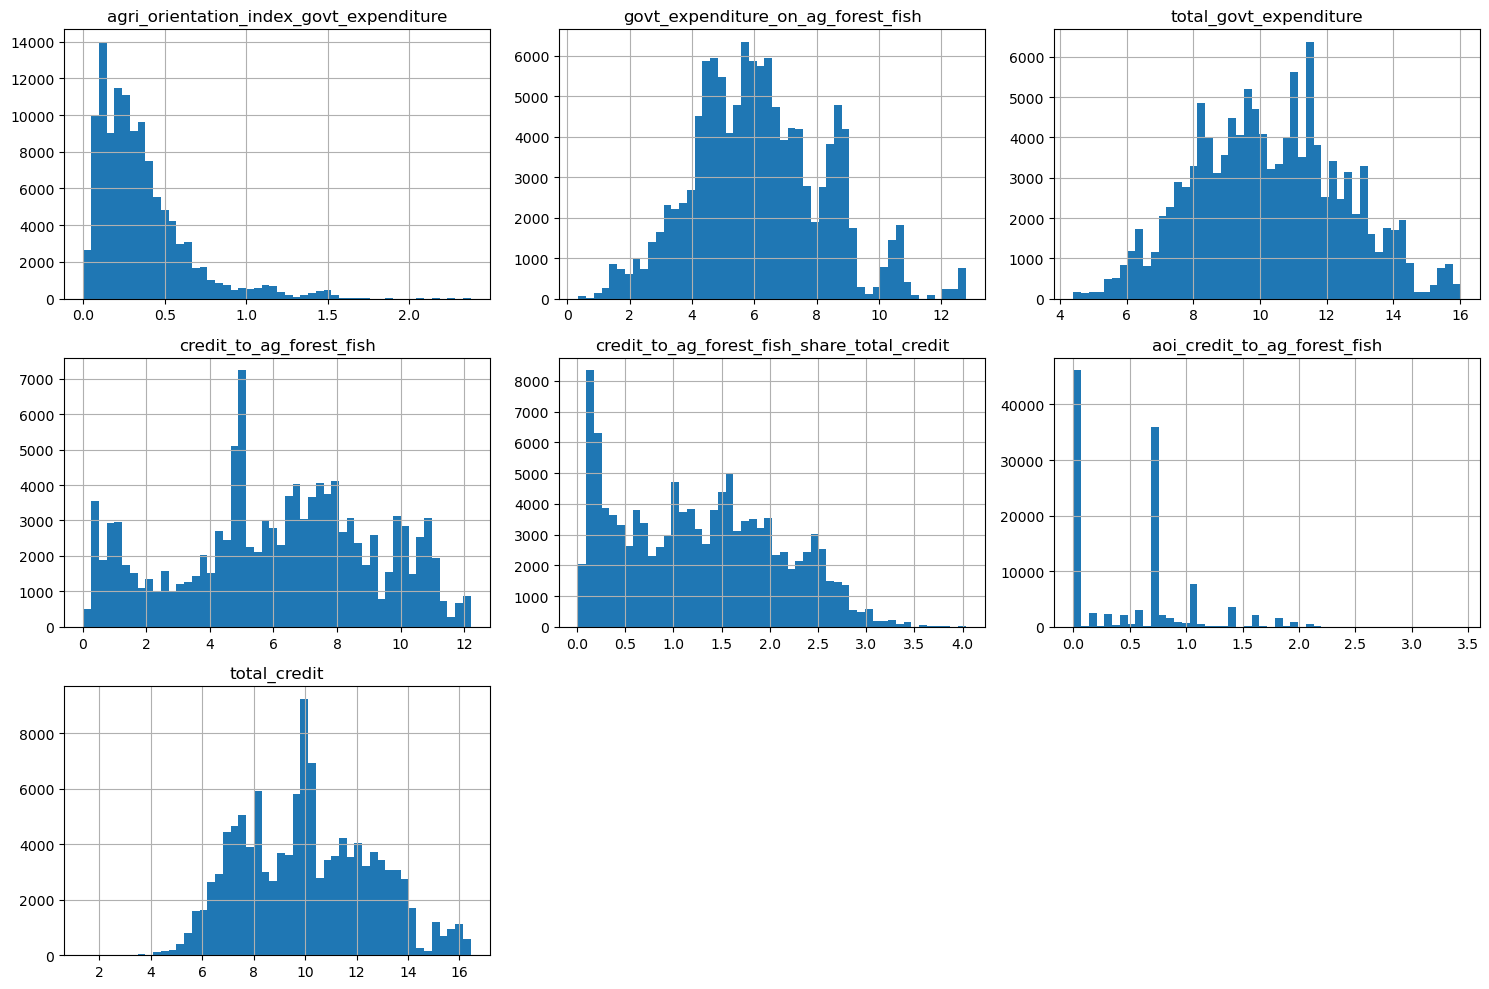

In [22]:
# Distribution of Credit variables (after log(1+x) transformation)
credit_vars_positive = [c for c in credit_vars if min(df_1[c]) >= 0]

np.log1p(df_1[credit_vars_positive]).hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()

**Insights from credit and FDI variable distributions:**

- Most credit-related variables are strongly right-skewed, consistent with earlier 
  variable groups, reflecting the disproportionate influence of larger economies. 
  After applying the log(1+x) transformation, the distributions become more symmetric 
  but show multimodal behavior, again hinting at clusters of large, mid-tier, 
  and smaller economies.

- For total_fdi_inflows, the pattern is more complex. The majority of observations 
  cluster near zero, while a smaller set of countries exhibit extreme positive and 
  negative values. The negative FDI values typically represent net disinvestment 
  (foreign investors withdrawing capital), so they carry real economic meaning 
  rather than being data errors.

  Because the variable spans both negative and positive ranges, standard log 
  transformations cannot be applied. In such cases, the Yeo-Johnson transformation 
  offers a suitable alternative- it generalizes the Box-Cox approach and can handle 
  both positive and negative values while stabilizing variance and reducing skewness. 
  Applying this transformation before fitting linear or distance-based models 
  (such as regression, kNN, or neural networks) helps improve model performance 
  by compressing extreme values, promoting a more symmetric distribution, and 
  ensuring that the variable’s scale does not disproportionately influence model 
  coefficients or distance metrics.

In [ ]:
# 'Yeo-Johnson' transformation tool is available via PowerTransformer sub-module
# inside sklearn.preprocessing module
from sklearn.preprocessing import PowerTransformer

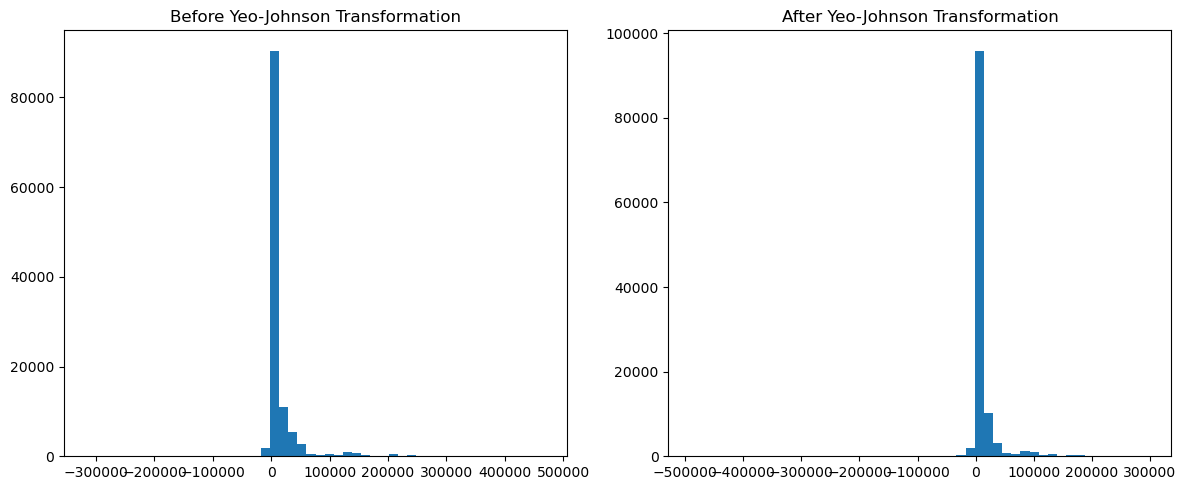

In [ ]:
# Initialize the transformer (no standardization, only transformation)
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Fit-transform
transformed_fdi = pt.fit_transform(df_1[['total_fdi_inflows']])

# Plot before and after transformation plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].hist(df_1['total_fdi_inflows'], bins=50)
axes[0].set_title('Before Yeo-Johnson Transformation')

axes[1].hist(transformed_fdi, bins=50)
axes[1].set_title('After Yeo-Johnson Transformation')

plt.tight_layout()
plt.show()

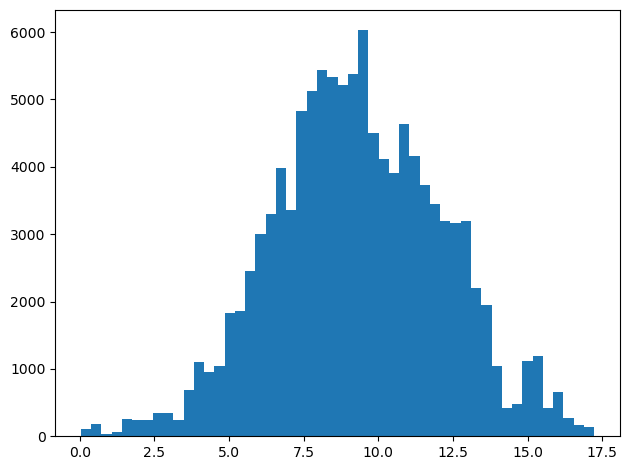

In [ ]:
# Check the performance of 'Yeo-Johnson transformation' on positive fdi values
pos_fdi = df_1.loc[df_1['total_fdi_inflows'] > 0][['total_fdi_inflows']]
transformed_pos_fdi = pt.fit_transform(pos_fdi)
plt.hist(transformed_pos_fdi, bins=50)
plt.tight_layout()
plt.show()

As you can notice, the 'Yeo-Johnson' transformation is not able to change the 
shape of the distribution for 'total_fdi_inflows' variable. There could be several 
reasons for it. The 'Yeo-Johnson' transformation aims to make a variable's 
distribution more symmetric and closer to normal by applying a single power 
parameter (λ) that adjusts the positive and negative values simultaneously. 

It failed to meaningfully reshape the data, probably because the variable 
'total_fdi_inflows' is highly asymmetric. It has 111,098 positive values (investments) 
and 6,109 negative values (disinvestments). The positive side is not only larger 
but also spans several orders of magnitude. You can see in the plot above, when 
'Yeo-Johnson' was applied to the positive values, it successfully reshaped the 
data. 

The 'total_fdi_inflows' data behaves like a mixture of two distict variables- 
'total_investment' and 'total_disinvestment'. So, to handle the structure more 
appropriately, we decided to decompose 'total_fdi_inflows' into three distinct 
components: 

- 'total_foreign_investments': captures the magnitude of positive inflows (for 
  countries/years with negative FDI, this will be 0)

- 'total_foreign_disinvestments': captures the magnitude of positive inflows (for 
  countries/years with negative FDI, this will be 0)

- 'is_negative_fdi': a binary flag indicating whether the observation represents 
  a disinvestment (1 if negative, else 0)

This decomposition retains both direction and magnitude information, produces 
variables with well-behaved, log-normal like distributions.

In [ ]:
# Keep only positive FDI values (investment inflows); 
# negative values are set to 0. Represents total foreign investments.
df_1['total_foreign_investments'] = df_1['total_fdi_inflows'].clip(lower=0)

# Keep only negative FDI values (disinvestments), convert them to positive magnitudes;
# positive values become 0. Represents total foreign disinvestments.
df_1['total_foreign_disinvestments'] = np.abs(df_1['total_fdi_inflows'].clip(upper=0))

# Create a binary indicator: 1 if FDI is negative (disinvestment), 0 otherwise.
df_1['is_negative_fdi'] = (df_1['total_fdi_inflows'] < 0).astype(int)

# Remove the original 'total_fdi_inflows' column since it has been decomposed 
# into the new variables.
df_1.drop(columns=['total_fdi_inflows'], inplace=True)

In [46]:
df_1.shape

(117207, 102)

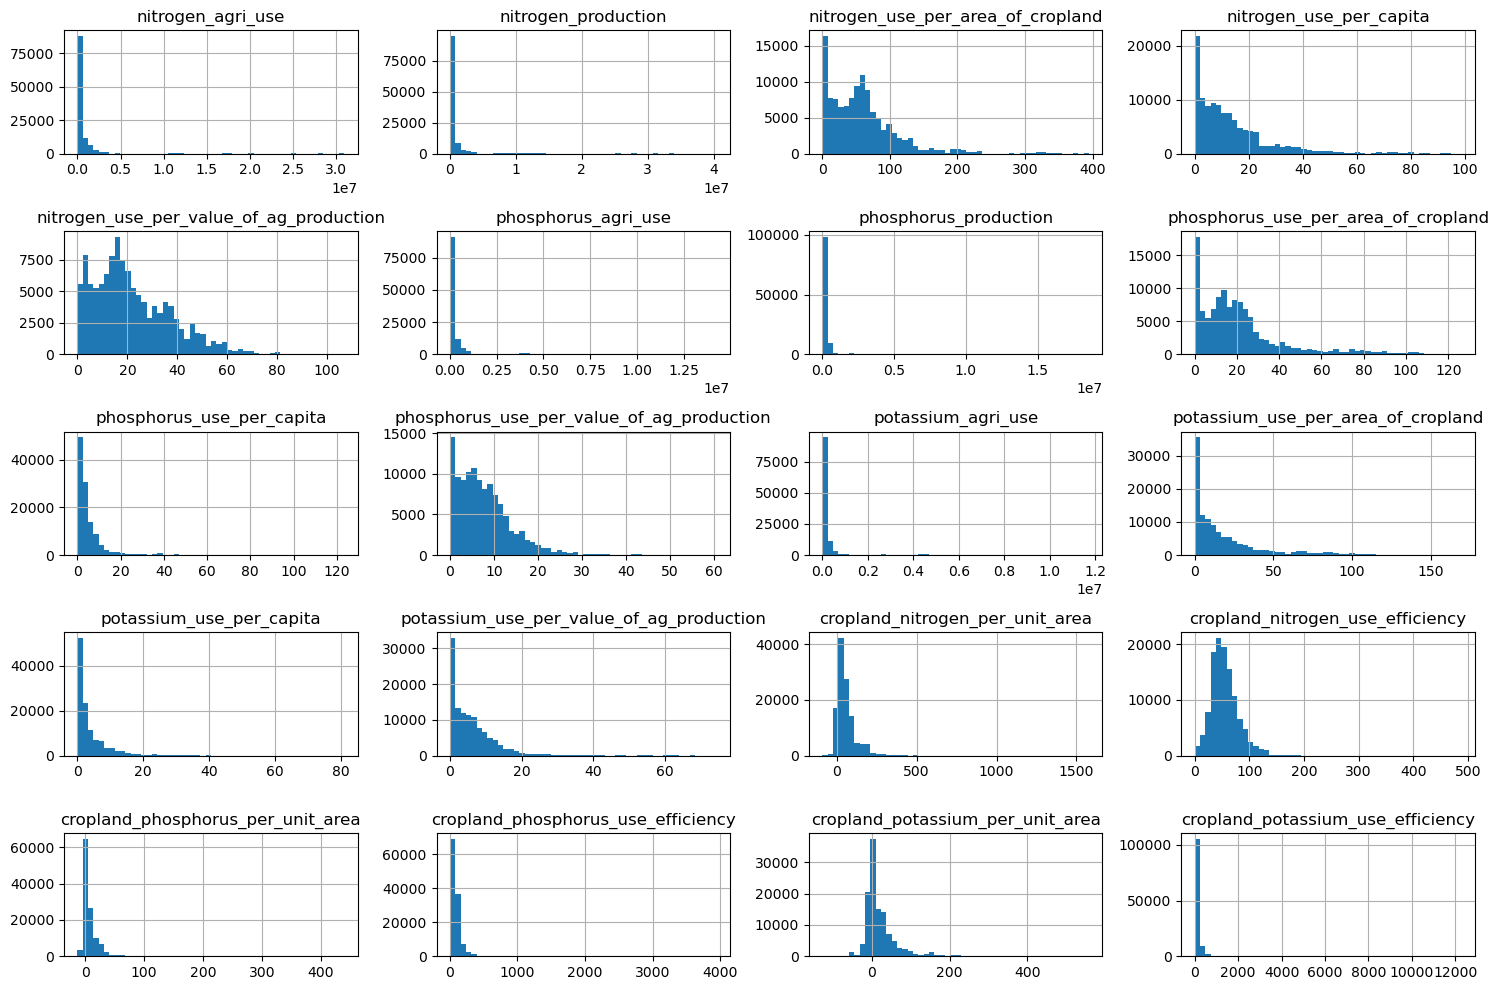

In [47]:
# Distribution of Fertilizer variables
df_1[fertilizer_vars].hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()

If you look closely, variables such as 'cropland_nitrogen_per_unit_area', 'cropland_phosphorus_per_unit_area', and 'cropland_potassium_per_unit_area' contain negative values. This isn’t a data entry or imputation error. These variables represent nutrient balance per unit cropland area, not total nutrient inputs. Consequently, negative values indicate nutrient depletion- situations where the cropland is extracting more nutrients than are being replenished through inputs.

To capture this dynamic more precisely, it makes sense to decompose each of these variables into three components:

- Replenish, representing nutrient surpluses (positive balances);

- Depletion, representing nutrient deficits (negative balances expressed as positive magnitudes); and

- is_negative, a binary indicator distinguishing between depletion and replenishment regimes.

In [70]:
# Keep only positive nutrient balance values (replenishment); 
# negative values are set to 0. Represents total nutrient replenishment per unit area.
df_1['nitrogen_replenish_per_unit_area'] = df_1['cropland_nitrogen_per_unit_area'].clip(lower=0)
df_1['phosphorus_replenish_per_unit_area'] = df_1['cropland_phosphorus_per_unit_area'].clip(lower=0)
df_1['potassium_replenish_per_unit_area'] = df_1['cropland_potassium_per_unit_area'].clip(lower=0)

# Keep only negative nutrient balance values (depletion), convert them to positive magnitudes;
# positive values become 0. Represents total nutrient depletion per unit area.
df_1['nitrogen_depletion_per_unit_area'] = np.abs(df_1['cropland_nitrogen_per_unit_area'].clip(upper=0))
df_1['phosphorus_depletion_per_unit_area'] = np.abs(df_1['cropland_phosphorus_per_unit_area'].clip(upper=0))
df_1['potassium_depletion_per_unit_area'] = np.abs(df_1['cropland_potassium_per_unit_area'].clip(upper=0))

# Create a binary indicator: 1 if nutrient balance is negative (depletion), 0 otherwise.
df_1['is_negative_N_balance'] = (df_1['cropland_nitrogen_per_unit_area'] < 0).astype(int)
df_1['is_negative_P_balance'] = (df_1['cropland_phosphorus_per_unit_area'] < 0).astype(int)
df_1['is_negative_K_balance'] = (df_1['cropland_potassium_per_unit_area'] < 0).astype(int)

# Remove the original columns since they have been decomposed 
# into the new variables.
df_1.drop(columns=[
    'cropland_nitrogen_per_unit_area',
    'cropland_phosphorus_per_unit_area', 
    'cropland_potassium_per_unit_area'
    ], inplace=True)

In [71]:
df_1.shape

(117207, 108)

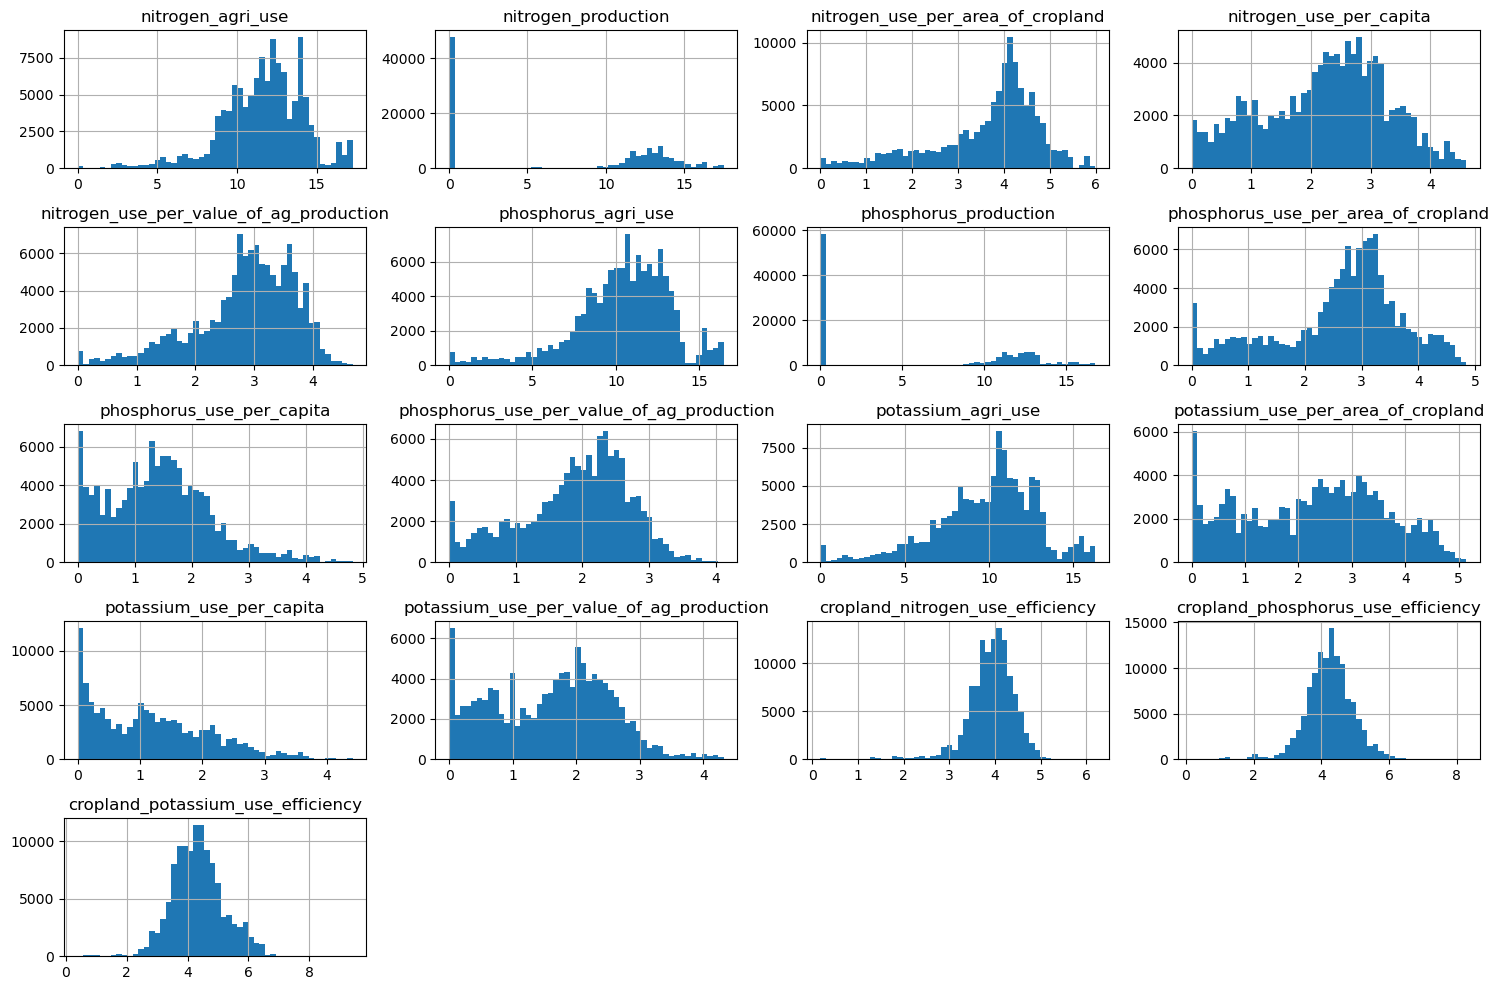

In [78]:
# Distribution of Fertilizer variables (after log(1+x) transformation)
fert_vars_positive = [c for c in fertilizer_vars if c not in [
                          'cropland_nitrogen_per_unit_area', 
                          'cropland_phosphorus_per_unit_area', 
                          'cropland_potassium_per_unit_area'] and
                          c in df_1.columns and 
                          (min(df_1[c]) >= 0)]
                      

np.log1p(df_1[fert_vars_positive]).hist(bins=50, figsize=(15,10))
plt.tight_layout()
plt.show()

For the variables 'nitrogen_production' and 'phosphorus_production', a large number of values are concentrated at zero, suggesting that certain countries do not produce these nutrients domestically. Introducing a binary flag variable to indicate the absence of nutrient production can be particularly beneficial for tree-based models, as it allows them to distinguish between countries with no production capacity and those with low but positive production levels. 

In [79]:
# adding flagging variable indicating zero nutrient production
for fert in ['nitrogen_production', 'phosphorus_production']:
    df_1[f"zero_{fert}"] = (df_1[fert] == 0).astype(int)

In [80]:
df_1.shape

(117207, 110)

In [ ]:


temp_change_vars = [
    'temp_change_meteorological_year', 'temp_change_dec_jan_feb',
    'temp_change_jun_jul_aug', 'temp_change_sep_oct_nov', 'temp_change_mar_apr_may'
]


emission_vars = [
    'emission_share_farmgate', 'emission_share_land_use_change',
    'emission_share_pre_and_post_production', 'emission_share_end_to_end_agrifood', 
    'emission_share_crops', 'emission_share_livestock', 
    'emission_share_ipcc_agriculture', 'emission_share_energy_use', 
    'emission_share_agri_waste_mgt'
]

demographic_vars = [
    'value_added_per_worker', 'employment_in_agri',
    'agri_employment_share_in_total_employment', 'total_employment_afs',
    'afs_employment_share_in_total_employment', 'rural_population',
    'urban_population', 'total_population'
]



pesticide_vars = [
    'total_pesticide_use_for_agriculture',
    'total_pesticide_use_per_area_of_cropland',
    'total_pesticide_use_per_capita',
    'total_pesticide_use_per_value_of_agri_production',
    'total_pesticide_export_quantity', 'total_pesticide_export_value',
    'total_pesticide_import_quantity', 'total_pesticide_import_value'
]

### Relationship of target variable with other predictors

In [104]:
from statsmodels.nonparametric.smoothers_lowess import lowess

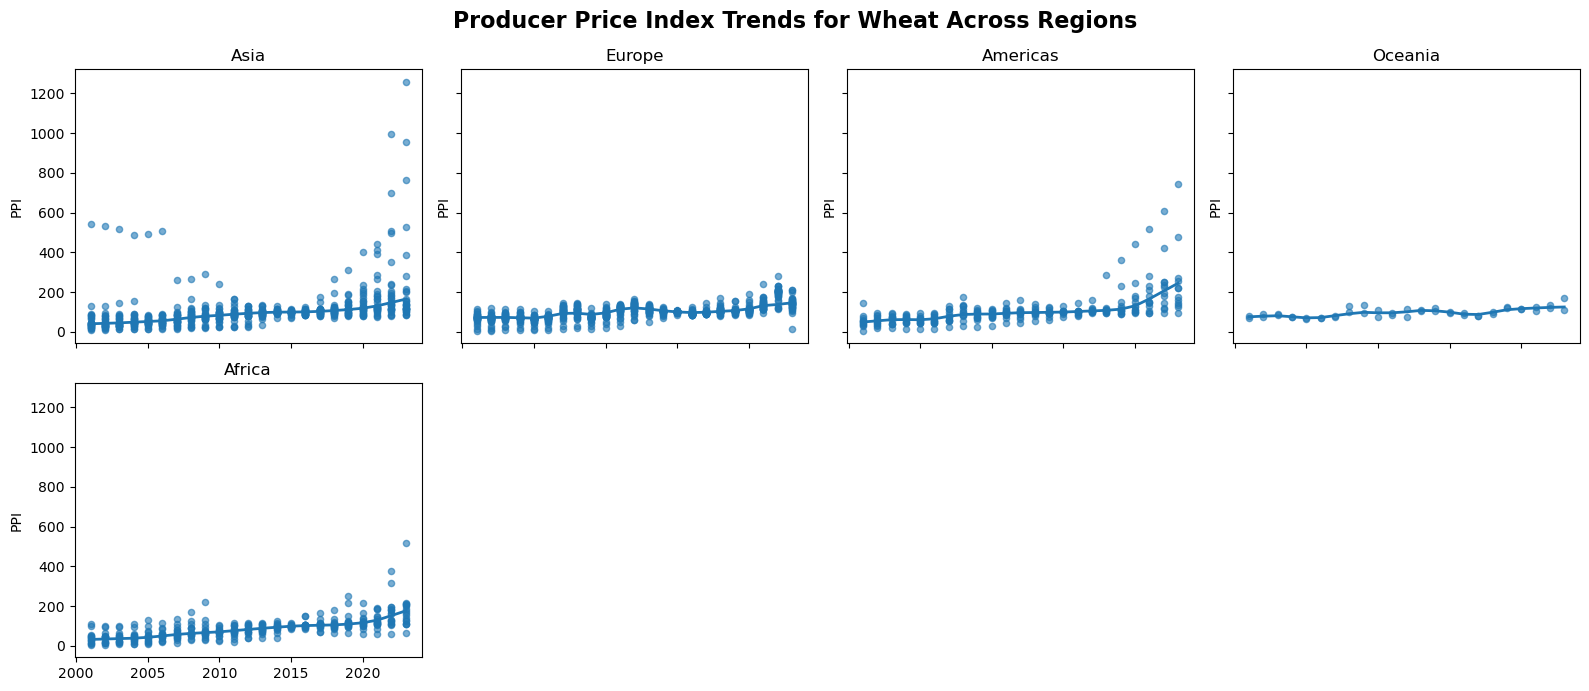

In [123]:
crop = 'Wheat'
df_crop = df_1.loc[df_1['item']==crop]

regions = df_crop['region'].unique()

n = len(regions)
cols = 4
rows = int(np.ceil(n/cols))

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.5*rows), sharey=True, sharex=True)
for ax, reg in zip(axes.flat, regions):
    sub = df_crop.loc[df_crop['region']==reg].sort_values('year')
    ax.scatter(sub['year'], sub['producer_price_index'], alpha=0.6, s=20)

    # LOWESS smooth (tune frac 0.2–0.6)
    smoothed = lowess(sub['producer_price_index'], sub['year'], frac=0.2)
    ax.plot(smoothed[:,0], smoothed[:,1], linewidth=2)

    ax.set_title(reg)
    ax.set_ylabel('PPI') 

# hide any extra axes if grid has more cells than sub_regions
for ax in list(axes.flat)[len(regions):]:
    ax.set_visible(False)

fig.suptitle(f'Producer Price Index Trends for {crop} Across Regions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

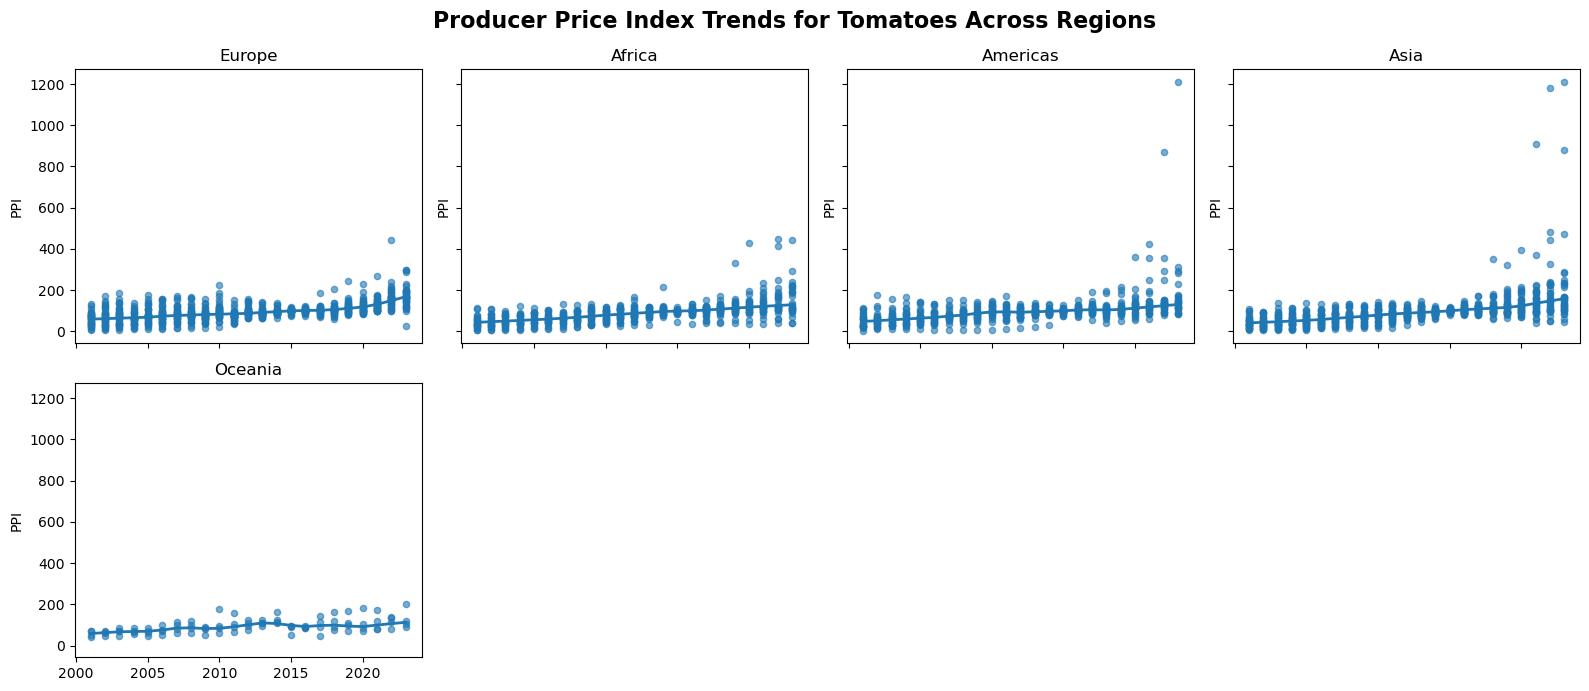

In [114]:
crop = 'Tomatoes'
df_crop = df_1.loc[df_1['item']==crop]

regions = df_crop['region'].unique()

n = len(regions)
cols = 4
rows = int(np.ceil(n/cols))

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.5*rows), sharey=True, sharex=True)
for ax, reg in zip(axes.flat, regions):
    sub = df_crop.loc[df_crop['region']==reg].sort_values('year')
    ax.scatter(sub['year'], sub['producer_price_index'], alpha=0.6, s=20)

    # LOWESS smooth (tune frac 0.2–0.6)
    smoothed = lowess(sub['producer_price_index'], sub['year'], frac=0.2)
    ax.plot(smoothed[:,0], smoothed[:,1], linewidth=2)

    ax.set_title(reg)
    ax.set_ylabel('PPI') 

# hide any extra axes if grid has more cells than sub_regions
for ax in list(axes.flat)[len(regions):]:
    ax.set_visible(False)

fig.suptitle(f'Producer Price Index Trends for {crop} Across Regions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

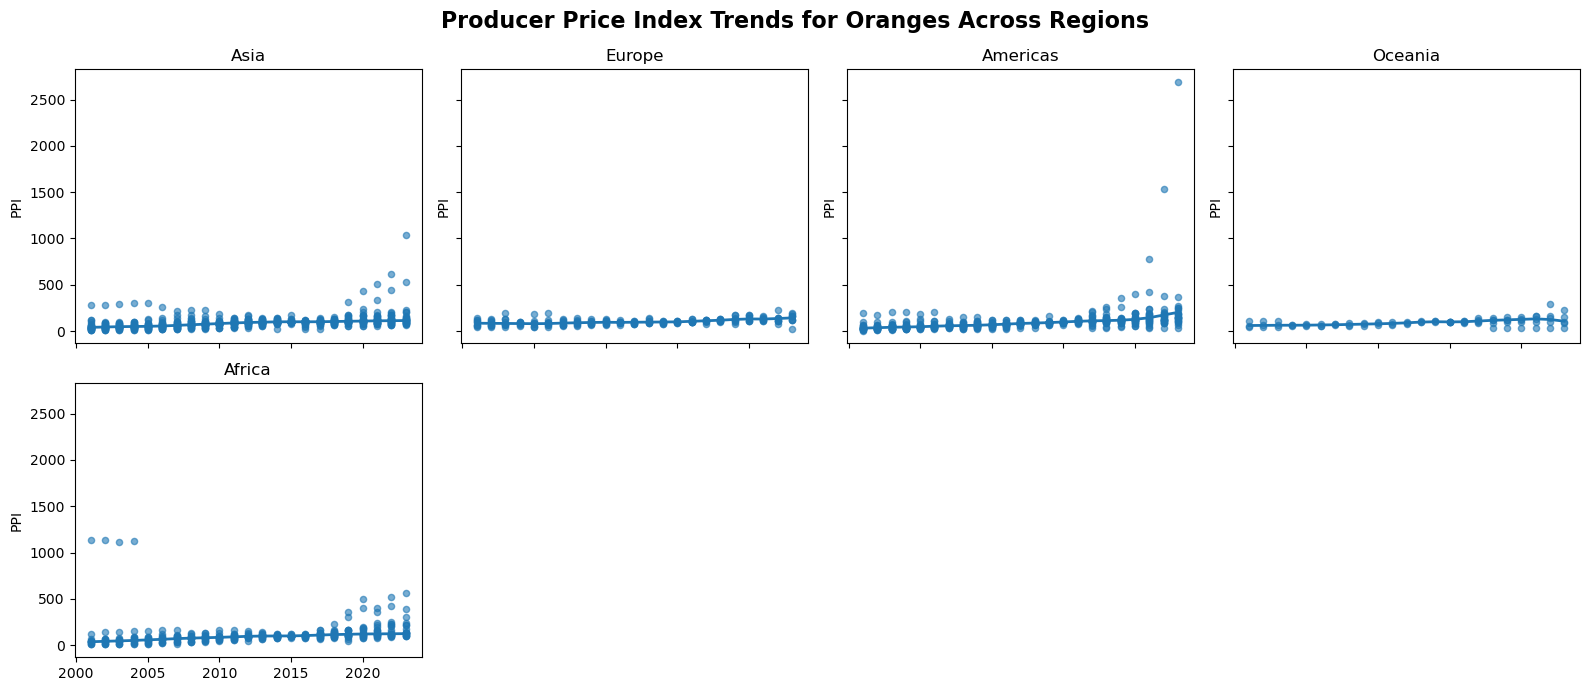

In [115]:
crop = 'Oranges'
df_crop = df_1.loc[df_1['item']==crop]

regions = df_crop['region'].unique()

n = len(regions)
cols = 4
rows = int(np.ceil(n/cols))

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.5*rows), sharey=True, sharex=True)
for ax, reg in zip(axes.flat, regions):
    sub = df_crop.loc[df_crop['region']==reg].sort_values('year')
    ax.scatter(sub['year'], sub['producer_price_index'], alpha=0.6, s=20)

    # LOWESS smooth (tune frac 0.2–0.6)
    smoothed = lowess(sub['producer_price_index'], sub['year'], frac=0.2)
    ax.plot(smoothed[:,0], smoothed[:,1], linewidth=2)

    ax.set_title(reg)
    ax.set_ylabel('PPI') 

# hide any extra axes if grid has more cells than sub_regions
for ax in list(axes.flat)[len(regions):]:
    ax.set_visible(False)

fig.suptitle(f'Producer Price Index Trends for {crop} Across Regions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

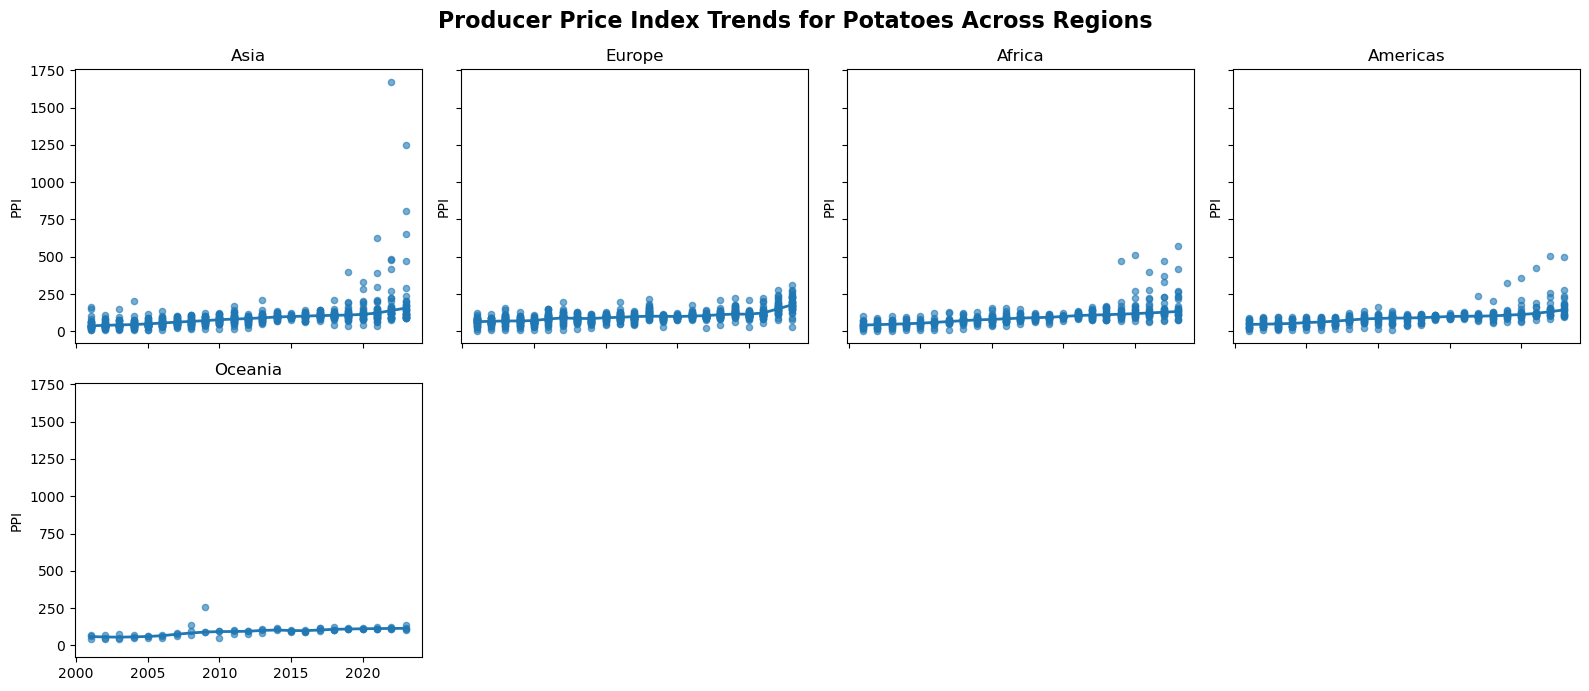

In [116]:
crop = 'Potatoes'
df_crop = df_1.loc[df_1['item']==crop]

regions = df_crop['region'].unique()

n = len(regions)
cols = 4
rows = int(np.ceil(n/cols))

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.5*rows), sharey=True, sharex=True)
for ax, reg in zip(axes.flat, regions):
    sub = df_crop.loc[df_crop['region']==reg].sort_values('year')
    ax.scatter(sub['year'], sub['producer_price_index'], alpha=0.6, s=20)

    # LOWESS smooth (tune frac 0.2–0.6)
    smoothed = lowess(sub['producer_price_index'], sub['year'], frac=0.2)
    ax.plot(smoothed[:,0], smoothed[:,1], linewidth=2)

    ax.set_title(reg)
    ax.set_ylabel('PPI') 

# hide any extra axes if grid has more cells than sub_regions
for ax in list(axes.flat)[len(regions):]:
    ax.set_visible(False)

fig.suptitle(f'Producer Price Index Trends for {crop} Across Regions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

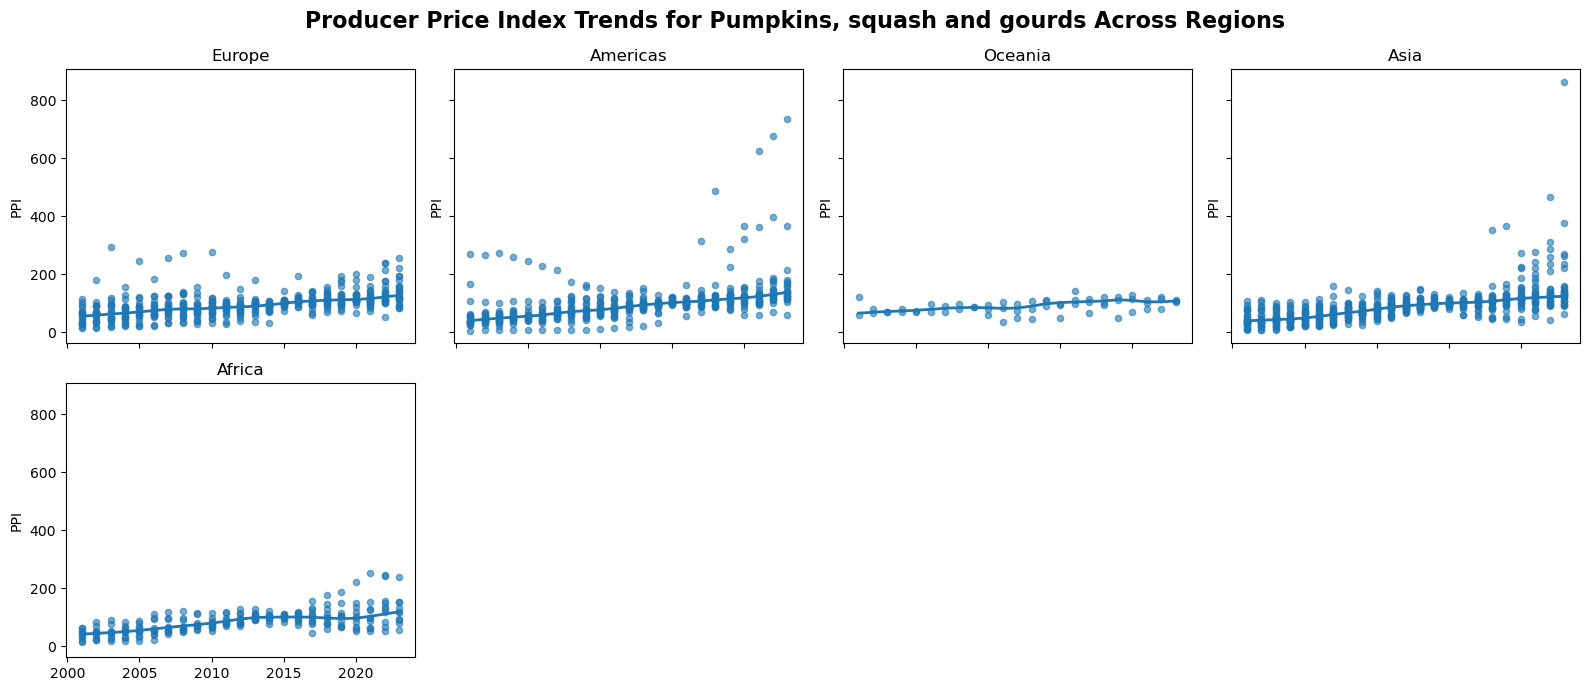

In [117]:
crop = 'Pumpkins, squash and gourds'
df_crop = df_1.loc[df_1['item']==crop]

regions = df_crop['region'].unique()

n = len(regions)
cols = 4
rows = int(np.ceil(n/cols))

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.5*rows), sharey=True, sharex=True)
for ax, reg in zip(axes.flat, regions):
    sub = df_crop.loc[df_crop['region']==reg].sort_values('year')
    ax.scatter(sub['year'], sub['producer_price_index'], alpha=0.6, s=20)

    # LOWESS smooth (tune frac 0.2–0.6)
    smoothed = lowess(sub['producer_price_index'], sub['year'], frac=0.2)
    ax.plot(smoothed[:,0], smoothed[:,1], linewidth=2)

    ax.set_title(reg)
    ax.set_ylabel('PPI') 

# hide any extra axes if grid has more cells than sub_regions
for ax in list(axes.flat)[len(regions):]:
    ax.set_visible(False)

fig.suptitle(f'Producer Price Index Trends for {crop} Across Regions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

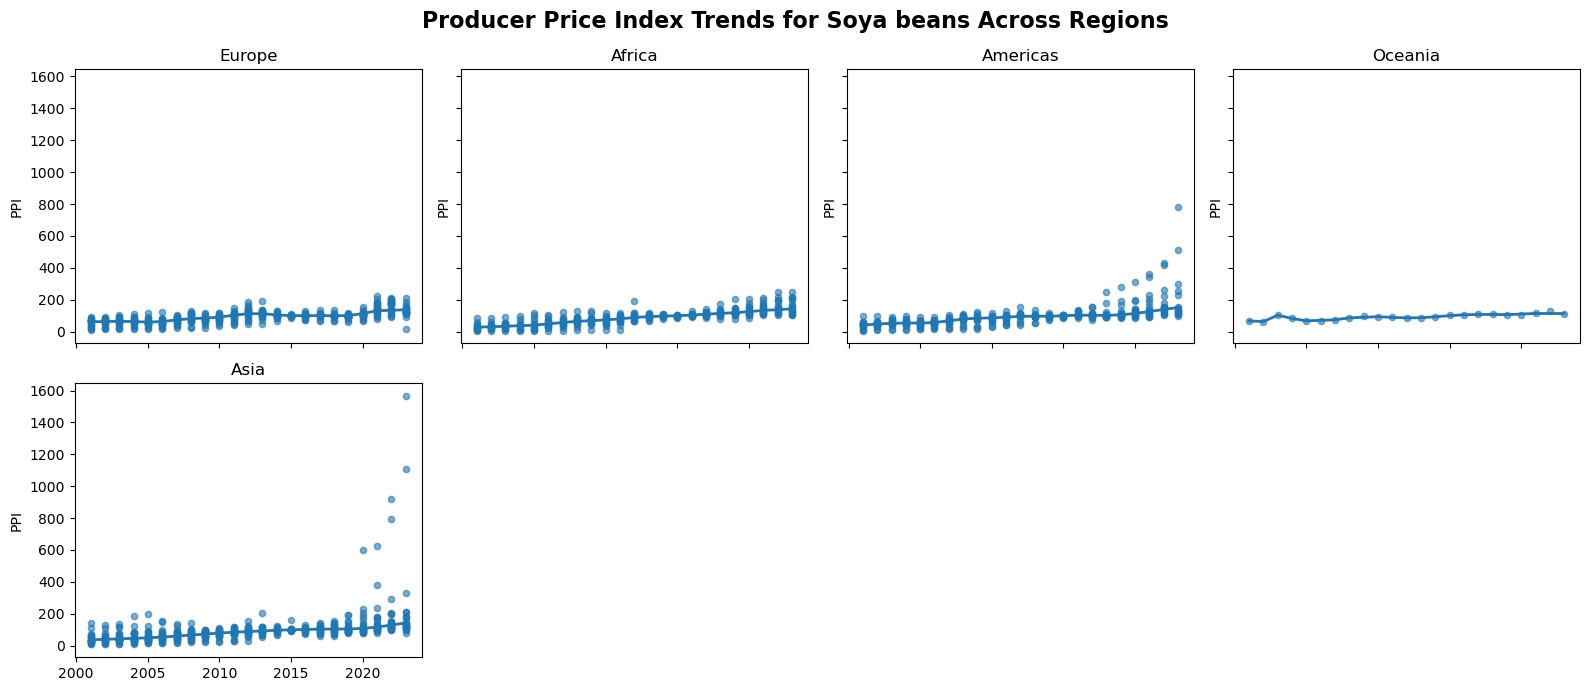

In [118]:
crop = 'Soya beans'
df_crop = df_1.loc[df_1['item']==crop]

regions = df_crop['region'].unique()

n = len(regions)
cols = 4
rows = int(np.ceil(n/cols))

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.5*rows), sharey=True, sharex=True)
for ax, reg in zip(axes.flat, regions):
    sub = df_crop.loc[df_crop['region']==reg].sort_values('year')
    ax.scatter(sub['year'], sub['producer_price_index'], alpha=0.6, s=20)

    # LOWESS smooth (tune frac 0.2–0.6)
    smoothed = lowess(sub['producer_price_index'], sub['year'], frac=0.2)
    ax.plot(smoothed[:,0], smoothed[:,1], linewidth=2)

    ax.set_title(reg)
    ax.set_ylabel('PPI') 

# hide any extra axes if grid has more cells than sub_regions
for ax in list(axes.flat)[len(regions):]:
    ax.set_visible(False)

fig.suptitle(f'Producer Price Index Trends for {crop} Across Regions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

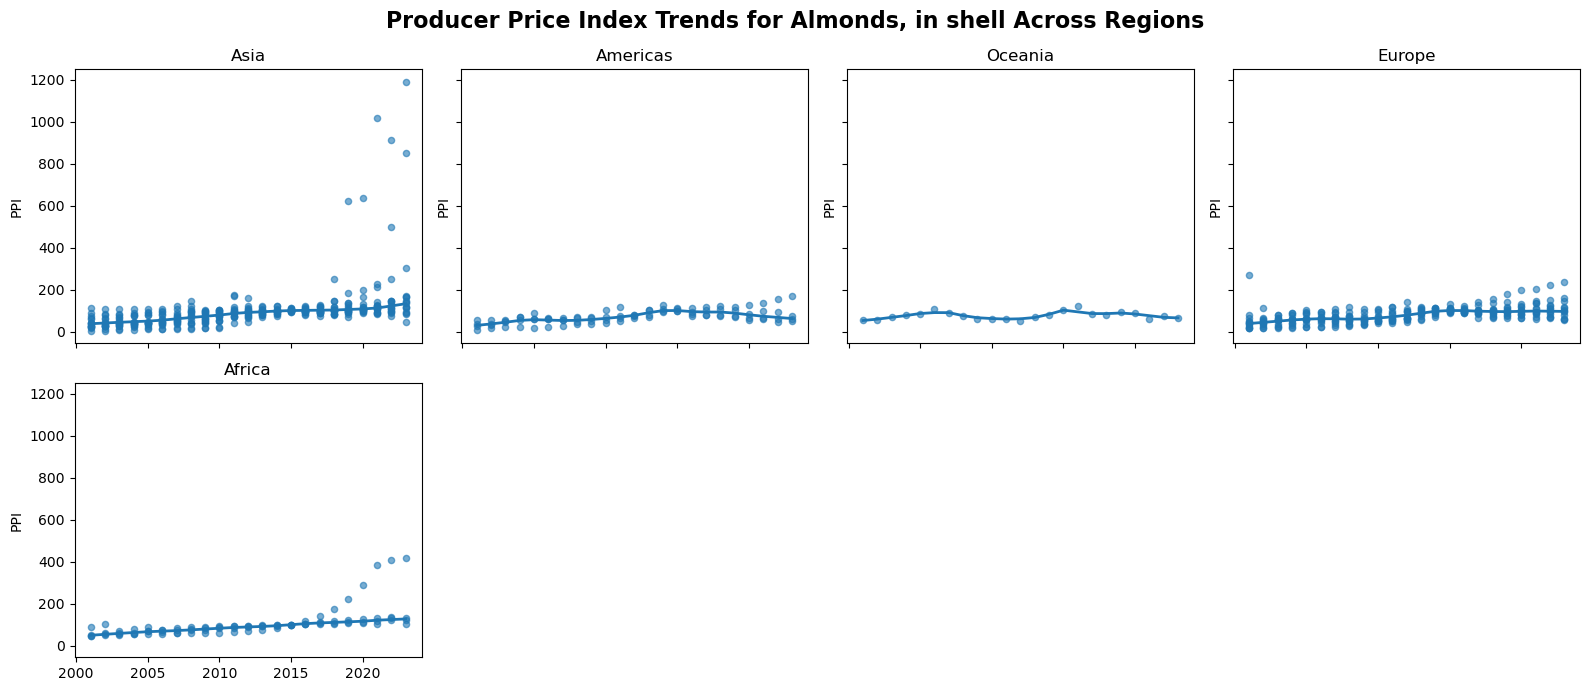

In [119]:
crop = 'Almonds, in shell'
df_crop = df_1.loc[df_1['item']==crop]

regions = df_crop['region'].unique()

n = len(regions)
cols = 4
rows = int(np.ceil(n/cols))

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.5*rows), sharey=True, sharex=True)
for ax, reg in zip(axes.flat, regions):
    sub = df_crop.loc[df_crop['region']==reg].sort_values('year')
    ax.scatter(sub['year'], sub['producer_price_index'], alpha=0.6, s=20)

    # LOWESS smooth (tune frac 0.2–0.6)
    smoothed = lowess(sub['producer_price_index'], sub['year'], frac=0.2)
    ax.plot(smoothed[:,0], smoothed[:,1], linewidth=2)

    ax.set_title(reg)
    ax.set_ylabel('PPI') 

# hide any extra axes if grid has more cells than sub_regions
for ax in list(axes.flat)[len(regions):]:
    ax.set_visible(False)

fig.suptitle(f'Producer Price Index Trends for {crop} Across Regions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

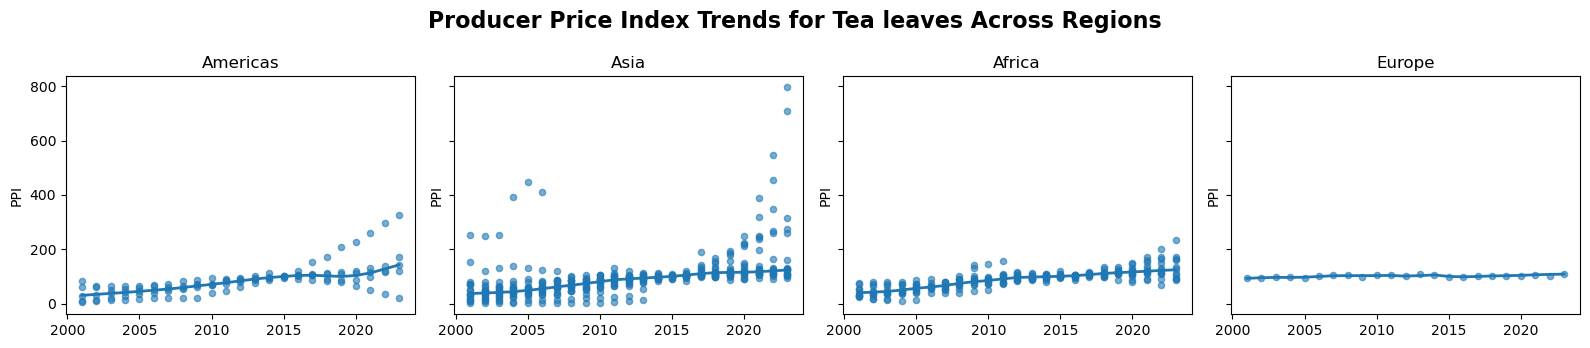

In [124]:
crop = 'Tea leaves'
df_crop = df_1.loc[df_1['item']==crop]

regions = df_crop['region'].unique()

n = len(regions)
cols = 4
rows = int(np.ceil(n/cols))

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.5*rows), sharey=True, sharex=True)
for ax, reg in zip(axes.flat, regions):
    sub = df_crop.loc[df_crop['region']==reg].sort_values('year')
    ax.scatter(sub['year'], sub['producer_price_index'], alpha=0.6, s=20)

    # LOWESS smooth (tune frac 0.2–0.6)
    smoothed = lowess(sub['producer_price_index'], sub['year'], frac=0.2)
    ax.plot(smoothed[:,0], smoothed[:,1], linewidth=2)

    ax.set_title(reg)
    ax.set_ylabel('PPI') 

# hide any extra axes if grid has more cells than sub_regions
for ax in list(axes.flat)[len(regions):]:
    ax.set_visible(False)

fig.suptitle(f'Producer Price Index Trends for {crop} Across Regions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

The plots indicate that producer_price_index values for major agricultural crops have shown a stronger upward trend in recent years across countries in Asia, followed by those in the Americas and Africa. In contrast, Europe and Oceania (including Australia and New Zealand) exhibit relatively stable PPI values with minimal fluctuations.

It is important to note that a higher rate of increase in PPI in Asia does not imply that farmers there are receiving higher absolute prices than those in the Americas or Europe. Rather, it reflects that farmers in Asia and Africa have experienced a more pronounced rise in the prices of their produce compared to their own historical baselines.

### Correlation of target variable with other numeric variables

In [125]:
# target variable
target = 'producer_price_index'

# Select only numeric columns
numeric_df = df_1.select_dtypes(include=['number'])

# Compute correlations of all numeric columns with the target
corr_with_target = numeric_df.corr()[target].sort_values(ascending=False)

In [126]:
# top 10 variables that are positively associated with target variable
corr_with_target.head(11)

producer_price_index                 1.000000
year                                 0.425123
temp_change_meteorological_year      0.226684
temp_change_sep_oct_nov              0.206362
temp_change_jun_jul_aug              0.193904
temp_change_dec_jan_feb              0.121951
total_pesticide_import_value         0.108408
total_pesticide_import_quantity      0.100927
temp_change_mar_apr_may              0.096465
potassium_depletion_per_unit_area    0.060072
nitrogen_use_per_area_of_cropland    0.059131
Name: producer_price_index, dtype: float64

In [127]:
# top 10 variables that are negatively associated with the target variable
corr_with_target = numeric_df.corr()[target].sort_values()
corr_with_target.head(11)

agri_employment_share_in_total_employment     -0.092613
afs_employment_share_in_total_employment      -0.086880
ag_forest_fish_share_in_total_gdp             -0.078360
gdp_annual_growth                             -0.076527
gfcf_annual_growth                            -0.072003
credit_to_ag_forest_fish_share_total_credit   -0.045883
value_added_ag_forest_fish_annual_growth      -0.039748
phosphorus_use_per_value_of_ag_production     -0.034963
employment_in_agri                            -0.030082
emission_share_land_use_change                -0.029916
total_employment_afs                          -0.026854
Name: producer_price_index, dtype: float64

In [128]:
# top 15 variables associated with the target variable by absolute correlation 
# strength
numeric_df.corr()[target].abs().sort_values(ascending=False).head(16)

producer_price_index                         1.000000
year                                         0.425123
temp_change_meteorological_year              0.226684
temp_change_sep_oct_nov                      0.206362
temp_change_jun_jul_aug                      0.193904
temp_change_dec_jan_feb                      0.121951
total_pesticide_import_value                 0.108408
total_pesticide_import_quantity              0.100927
temp_change_mar_apr_may                      0.096465
agri_employment_share_in_total_employment    0.092613
afs_employment_share_in_total_employment     0.086880
ag_forest_fish_share_in_total_gdp            0.078360
gdp_annual_growth                            0.076527
gfcf_annual_growth                           0.072003
potassium_depletion_per_unit_area            0.060072
nitrogen_use_per_area_of_cropland            0.059131
Name: producer_price_index, dtype: float64

In [129]:
# compute correlation matrix
corr = numeric_df.corr()
labels = corr.columns.to_list()
n = len(labels)

In [130]:
"""
import required sub-module of matplotlib that provides control over how tick 
marks are placed and formatted. This is important when we have large number of 
features. By default, Matplotlib don't show all the features in plot when there 
are large number of them. 
"""

import matplotlib.ticker as mticker

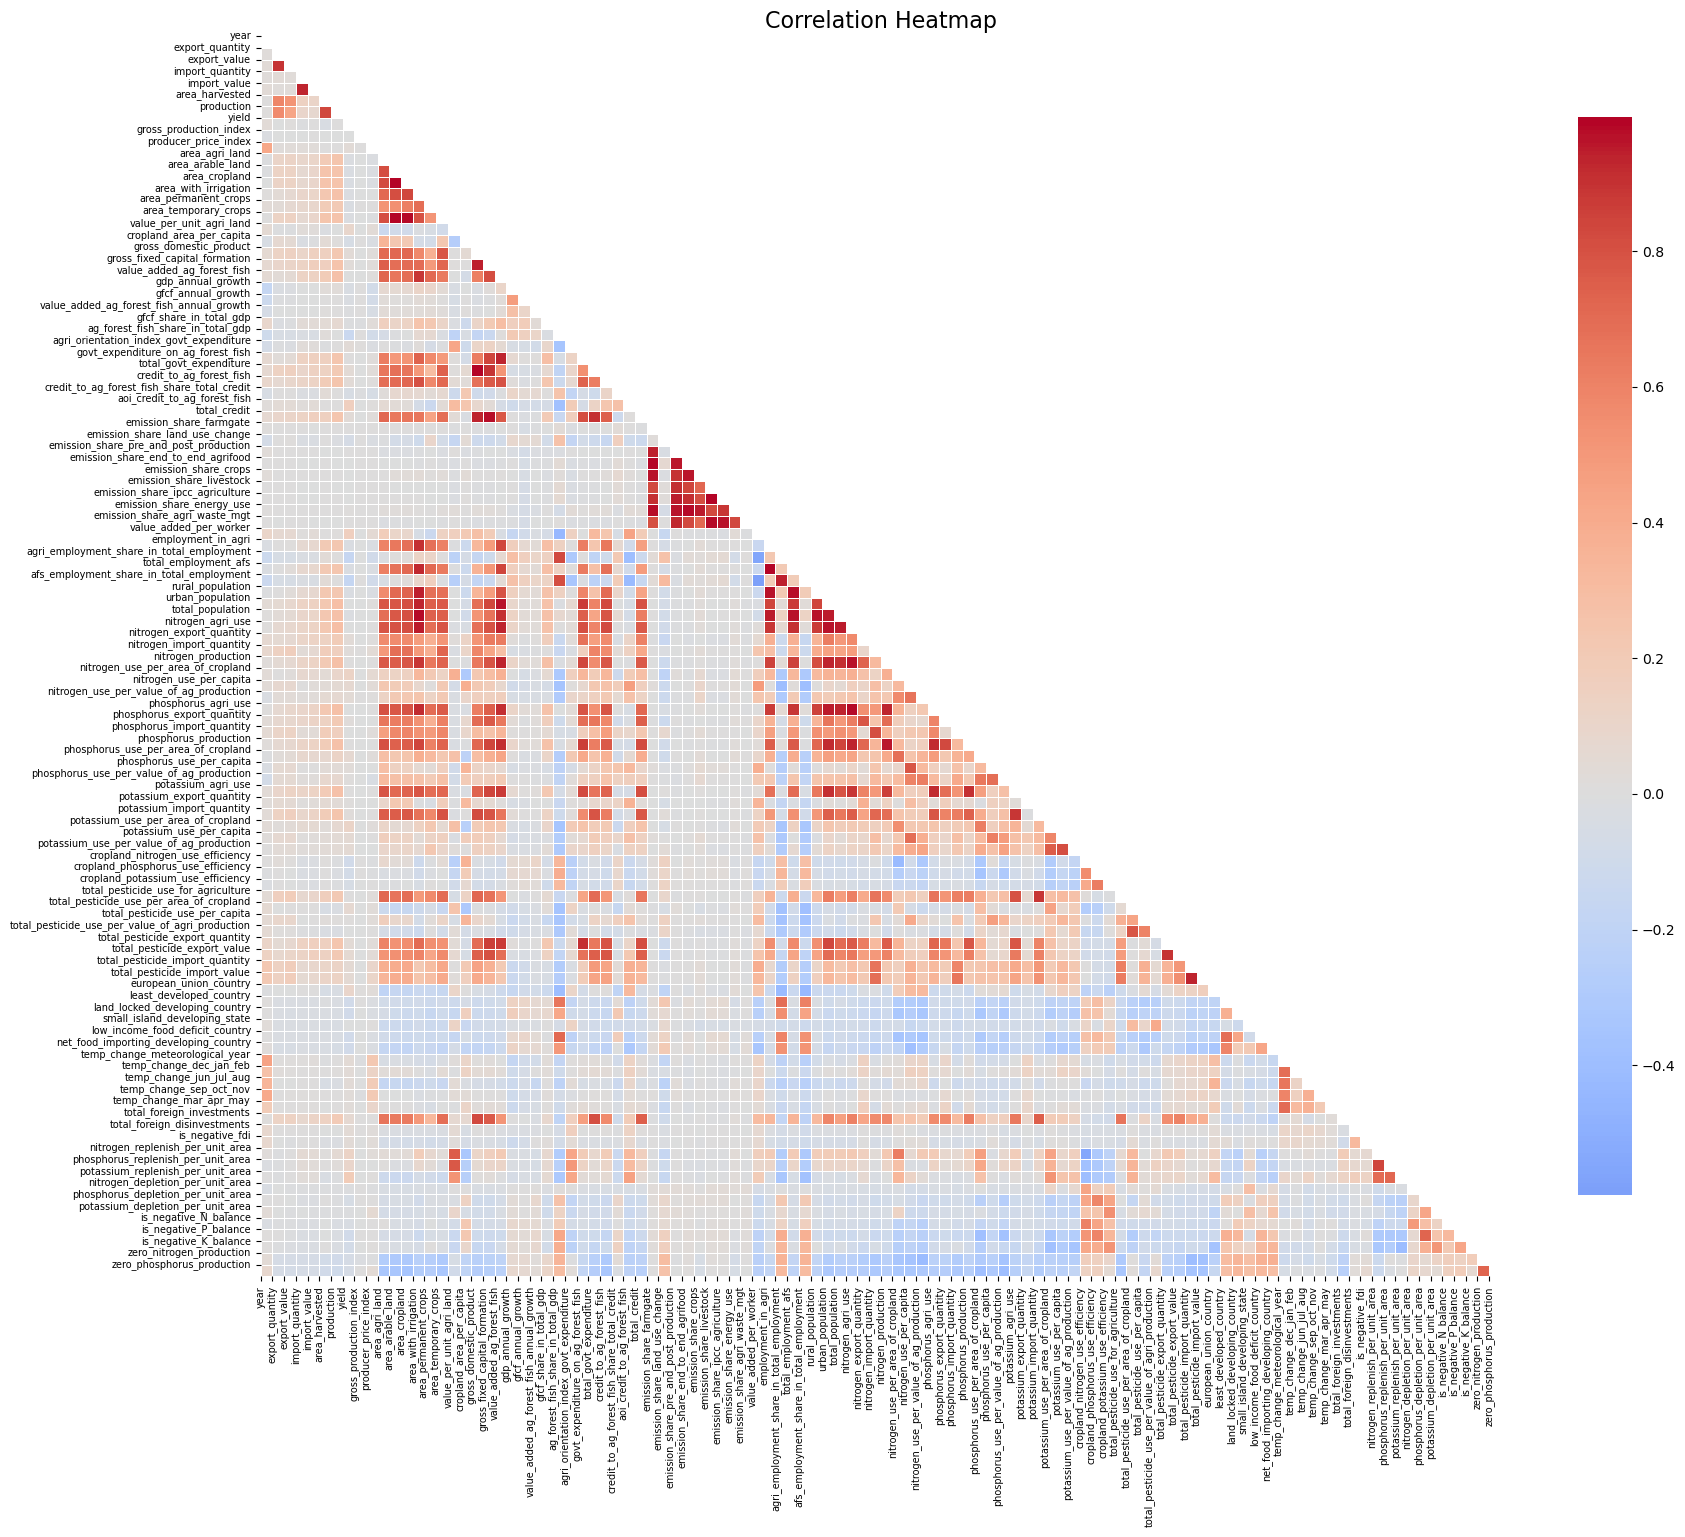

In [131]:
"""
Heatmap of whole correlation matrix
"""

# create mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20,20))
ax = sns.heatmap(
        corr,
        mask=mask, 
        cmap='coolwarm', 
        center=0,
        square=True, # makes each cell a perfect square
        linewidth=0.5,
        cbar_kws={"shrink": 0.7} # shrinks the color bar to 70% of default size
        )

# Force every tick/label to render
locs = np.arange(n)

# Explicitly sets tick positions on both axes (this prevents Matplotlib from 
# auto-deciding which ticks to skip)
ax.set_xticks(locs)
ax.set_yticks(locs)

# lock tick positions using FixedLocator from matplotlib.ticker
ax.xaxis.set_major_locator(mticker.FixedLocator(locs))
ax.yaxis.set_major_locator(mticker.FixedLocator(locs))
ax.set_xticklabels(labels, rotation=90, ha="center", fontsize=6)
ax.set_yticklabels(labels, fontsize=6)

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=90, fontsize=7)
plt.yticks(fontsize=7)
plt.savefig('plots/heatmap_full_corr_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

**Correlation heatmaps help us draw two key insights from a dataset:** 

1. *Relationship with the target variable:* 
They reveal how strongly each predictor is associated with the target. Features 
showing high correlation (positive or negative) with the target may serve as 
strong predictors.


2. *Interrelationships among predictors (multicollinearity):* 
They highlight predictors that are highly correlated with one another, suggesting 
redundancy or overlapping information that could affect model stability.

From the correlation heatmap, it is evident that none of the variables exhibit a 
strong association with the target variable. The highest correlation is observed 
for ‘year’ with an absolute value of |r| = 0.43, indicating a moderate relationship 
at best. In addition, several clusters of features show high inter-correlations, 
suggesting the presence of potential multicollinearity within the dataset. 

/Users/gurjitsingh/opt/anaconda3/envs/py312/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/gurjitsingh/opt/anaconda3/envs/py312/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


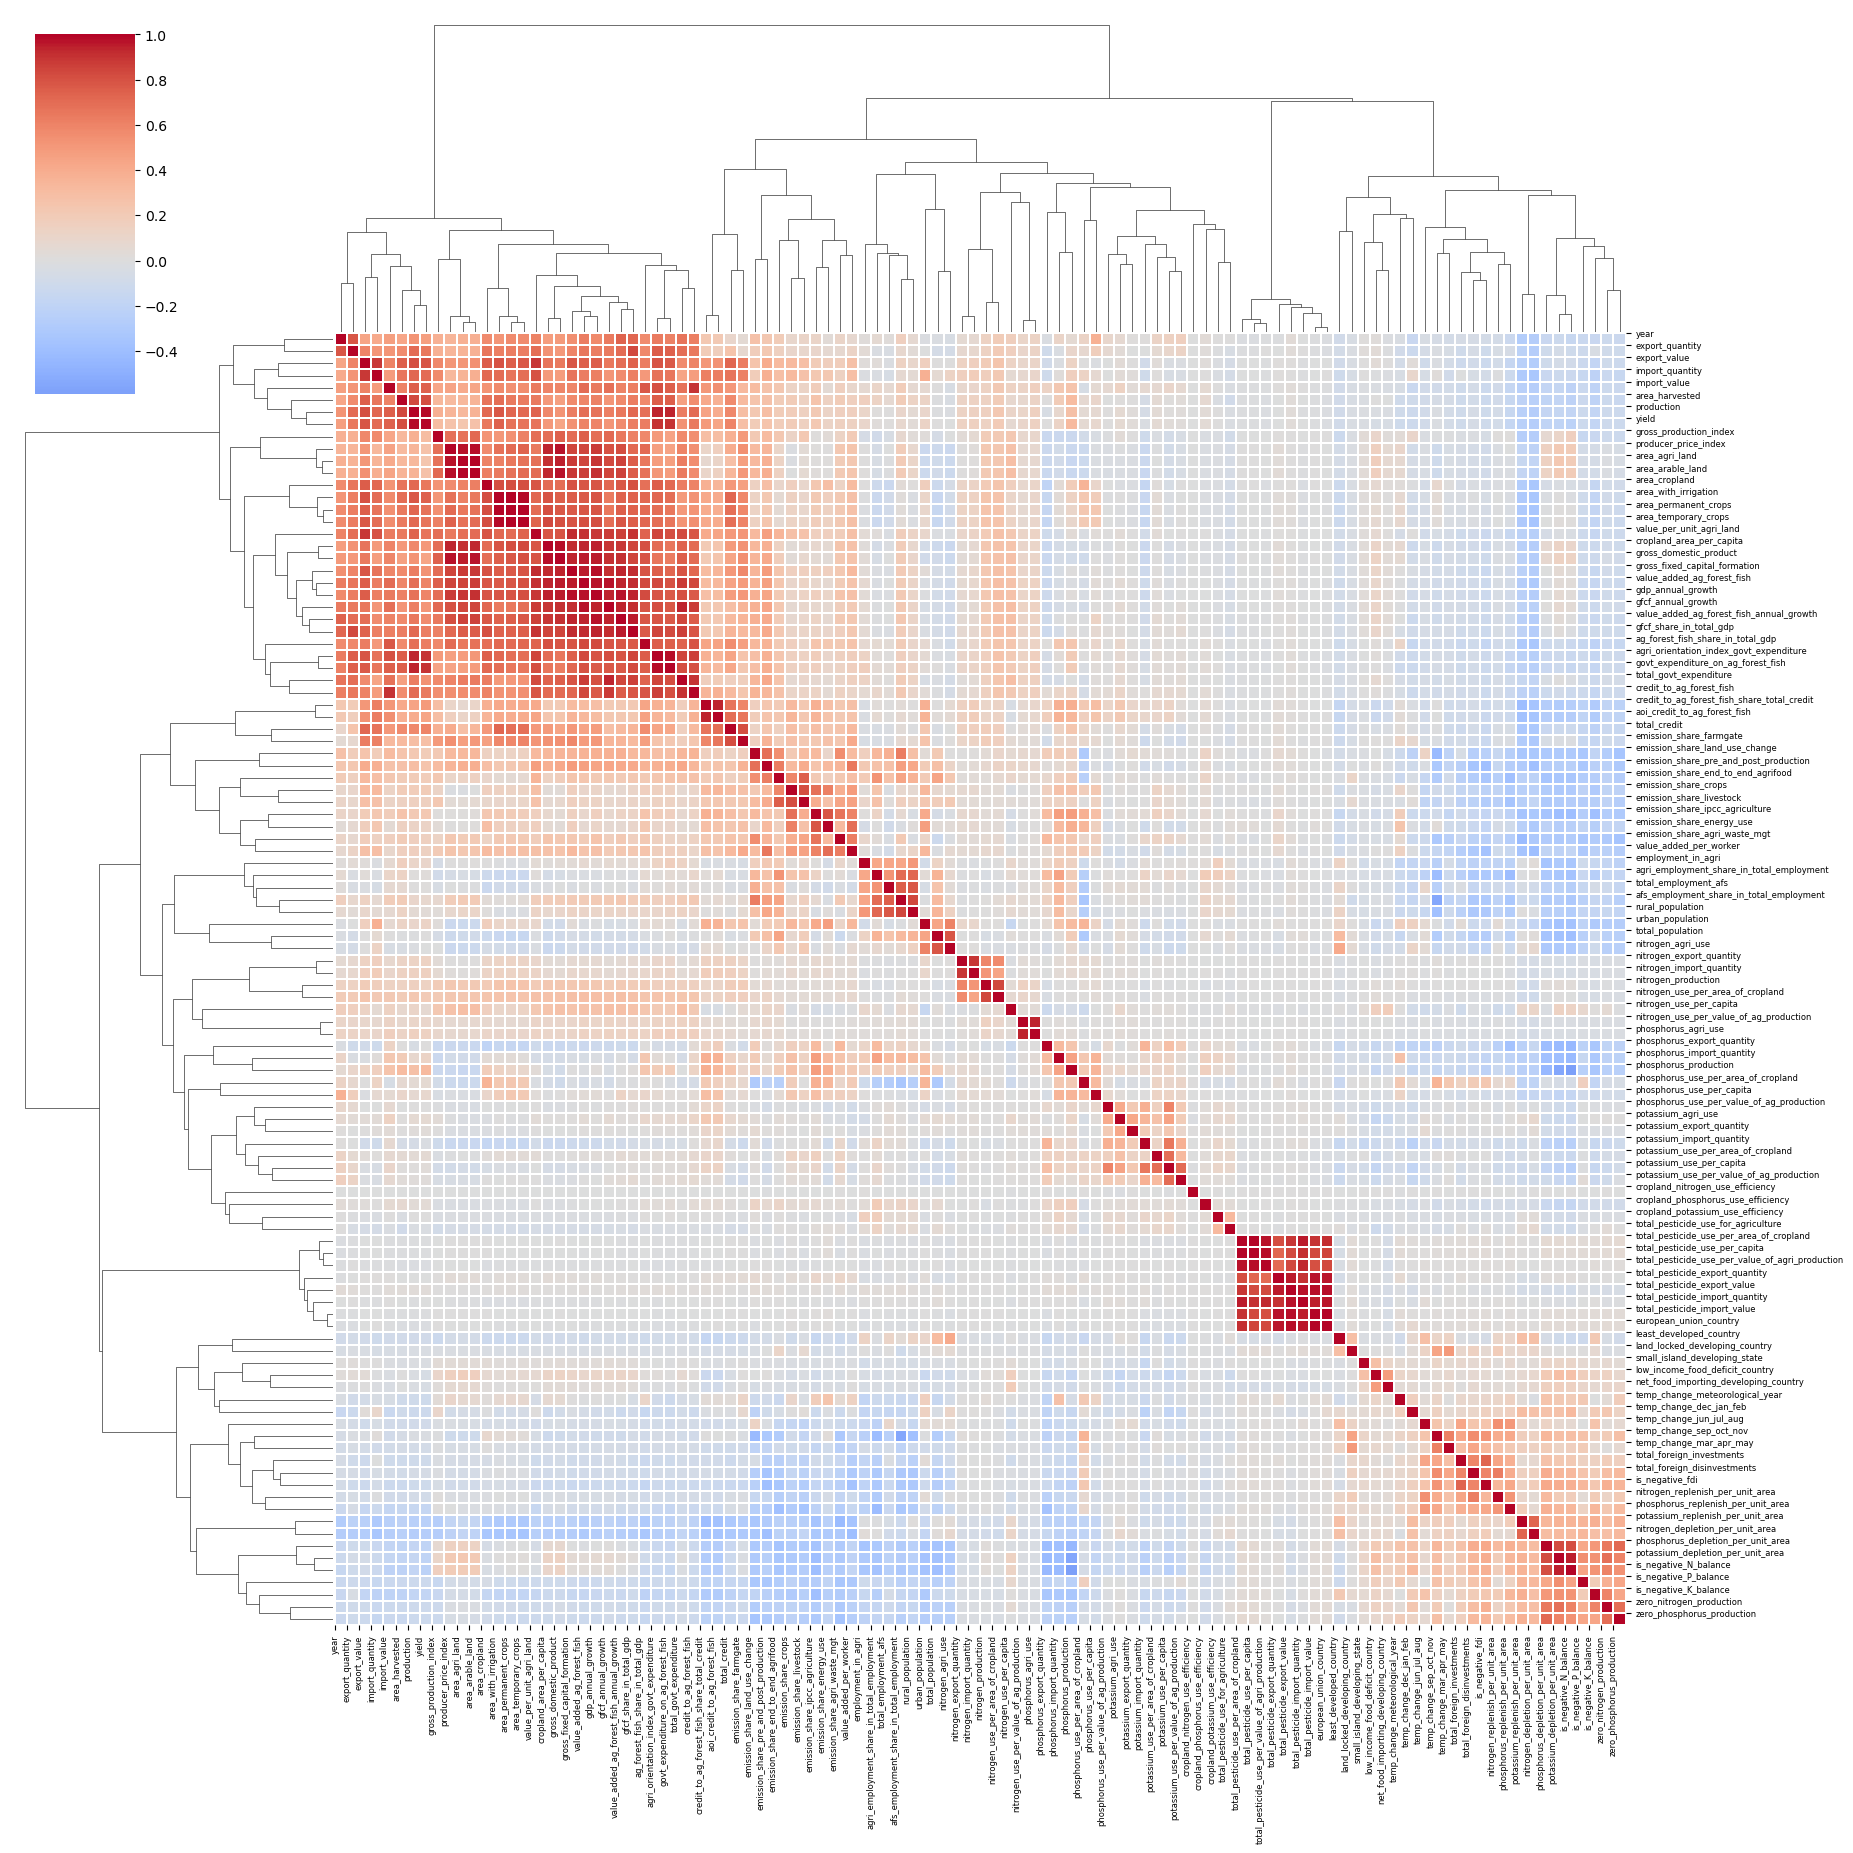

In [132]:
"""
--- Clustered heatmap of whole correlation matrix ---

It doesn't just plot correlations, it reorders columns using hierarchical 
clustering so that highly correlated variables appear together.

'cg' is the ClusterGrid object which contains multiple subplots: heatmap, 
two dendrograms, and colorbar.

'ax = cg.ax_heatmap' extracts the Axes object corresponding to the actual heatmap 
(excluding the dendrograms).

'matplotlib.ticker.FixedLocator' forces Matplotlib to place ticks exactly at those 
locations (no auto-skipping). By default, Matplotlib skips some labels when 
there are too many to fit.
"""
 
cg = sns.clustermap(
        corr,
        cmap='coolwarm',
        center=0, # ensures 0 is at the center of the color map
        figsize=(20,20),
        linewidths=0.3 # draws faint gridlines between cells
    )

ax = cg.ax_heatmap # extracts the Axes object corresponding to the actual heatmap
ax.xaxis.set_major_locator(mticker.FixedLocator(locs))
ax.yaxis.set_major_locator(mticker.FixedLocator(locs))
ax.set_xticklabels(labels, ha="center", fontsize=6)
ax.set_yticklabels(labels, fontsize=6)

plt.savefig('plots/heatmap_full_corr_clustermap.png', dpi=300, bbox_inches='tight')
plt.show()


From the correlation heatmap and clustermap, it is clear that there is potential
multi-collinearity present among the predictor variables, which we would have to 
handle to remove redundancy and prevent overfitting issues while modelling. Now, 
there are two distinct pathways to follow for feature selection- 

1. **Classical Statistical Feature Selection:** 

- In this, the core idea is to select features based on their individual statistical 
  significance or pairwise correlation with the target variable. Examples include- 
  Stepwise regression, p-values, F-tests, ANOVA, correlation-based filtering.

- The advantage of these procedures is that they are simple to interpret and 
  implement. These provide interpretable metrics (i.e., coefficients, p-values).

- Their disadvantage is that these procedures assume independent predictors with 
  linear relationships. Moreover, these methods fail with strong multicollinearity. 
  These methods ignore non-linear and interaction effects. 

Baseline is- these classical statistical approaches optimizes explanatory power 
at the expense of predictive accuracy. 

2. **Modern Model-Based Feature Selection:**

- In this approach, the core idea is to let the model decide which features 
  improve prediction by minimizing loss under regularization or ensemble averaging. 
  Examples include- LASSO/Ridge/ElasticNet, tree-based models (Random Forest, XGBoost, 
  LightGBM), Recursive Feature Elimination (RFE), Permutation Importance. 

- The advantage of these methods is that- they can handle high dimensional data 
  with multicollinearity and captures non-linear relationships with interactions. 

- However, the disadvantage is that these methods are less interpretable and 
  computationally heavier. 

These methods optimize for predictive accuracy at the expense of interpretability.


